<a href="https://colab.research.google.com/github/Bigdataunibo/Lab-of-Big-Data/blob/main/Copy_of_BigData_DataMastersGroup_GreenComputing_and_LLMsForTimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### install and import the essential libraries

In [32]:
!pip install pandas
!pip install pyarrow
#!pip install examon


In [33]:
%matplotlib inline
import getpass
#from examon.submodule import Client
#from examon import Client, ExamonQL
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


In [34]:
#drive.mount('/content/BigData')
drive.mount('/content/BigData', force_remount=True)


Mounted at /content/BigData


###Testing some features

**What is Time Series Data and its characteristics?**

Time series data is a collection of data points that are recorded or collected in sequence over time. In other words, it is a series of data points ordered by time intervals, where each data point corresponds to a specific moment in time. Time series data is very common in different areas like finance, economics, weather forecasting, and signal processing.

## Key Characteristics of Time Series Data:

### 1. Time Dependence
Time series data is very much related to time. Each data point has a specific timestamp or time period, and the order of data points is important for analysis. The sequence of time helps in understanding and interpreting the data.

### 2. Temporal Aggregation
Time series data can be grouped over different time intervals like minutes, hours, days, months, or years. Grouping data at different levels can show different insights and patterns that may not be visible in the raw data.

### 3. Trend
A trend in time series data shows the general direction in which the data is moving over time. Trends can be upward (increasing), downward (decreasing), or stable (constant). Identifying trends is important for long-term forecasting and planning.

### 4. Seasonality
Many time series datasets show seasonal patterns or regular changes that repeat at consistent intervals. These seasonal variations can be daily, weekly, monthly, or yearly, influenced by things like weather, holidays, or economic cycles. Recognizing seasonality is important for accurate modeling and prediction.

### 5. Random Variation
Time series data usually includes random changes or noise around the main trend and seasonal patterns. This randomness can come from different sources like measurement errors, random shocks, or natural variability. Understanding these random variations is essential for improving models and predictions.

### 6. Autocorrelation
Autocorrelation measures the relationship between observations at different time lags within the same time series. Positive autocorrelation means that nearby observations are related, while negative autocorrelation means an inverse relationship. Analyzing autocorrelation helps in finding patterns and dependencies within the data.

### 7. Stationarity
Stationarity is a useful property of time series data where statistical properties like mean, variance, and autocovariance stay the same over time. Stationary time series are easier to model and forecast compared to non-stationary ones. Techniques to make data stationary are often used to make analysis and prediction easier.

In conclusion, understanding the characteristics of time series data is important for effective analysis and forecasting. By recognizing patterns like trends, seasonality, and autocorrelation, and dealing with challenges like non-stationarity and random variation, we can get meaningful insights and make good decisions based on time series data.


**What is Big Data Analysis?**

Big data analysis refers to the process of examining and interpreting large and complex datasets, commonly known as big data, to uncover hidden patterns, trends, correlations, and insights that can inform decision-making, improve processes, and drive innovation. Big data analysis involves applying advanced analytical techniques and tools to extract valuable information from massive volumes of structured, semi-structured, and unstructured data.

## Key Aspects of Big Data Analysis

### 1. Volume
Big data analysis deals with datasets of immense size, often ranging from terabytes to petabytes or even exabytes. Traditional data processing tools and techniques are inadequate for handling such large volumes of data efficiently.

### 2. Velocity
Big data is generated at high velocity from various sources such as social media, sensors, Internet of Things (IoT) devices, and transactional systems. Analyzing data streams in real-time or near real-time is essential for extracting timely insights and taking immediate actions.

### 3. Variety
Big data comes in diverse formats, including structured data (e.g., relational databases), semi-structured data (e.g., XML, JSON), and unstructured data (e.g., text documents, images, videos). Analyzing this variety of data requires flexible and scalable approaches that can handle different data types effectively.

### 4. Veracity
Big data analysis often involves dealing with data of uncertain quality, integrity, or accuracy. It is essential to address data quality issues, such as missing values, outliers, and inconsistencies, to ensure reliable and trustworthy analysis results.

### 5. Value
The ultimate goal of big data analysis is to derive actionable insights and create value from the data. This may involve identifying new business opportunities, optimizing processes, enhancing customer experiences, mitigating risks, or making data-driven decisions.

## Techniques and Technologies in Big Data Analysis

### 1. Data Mining
Data mining techniques, such as clustering, classification, association rule mining, and anomaly detection, are applied to uncover patterns and relationships within large datasets.

### 2. Machine Learning
Machine learning algorithms, including supervised learning, unsupervised learning, and reinforcement learning, are used to build predictive models, classification models, recommendation systems, and anomaly detection systems.

### 3. Natural Language Processing (NLP)
NLP techniques are employed to extract insights from unstructured text data, such as sentiment analysis, topic modeling, and entity recognition.

### 4. Distributed Computing
Big data analysis often requires distributed computing frameworks like Apache Hadoop, Apache Spark, and distributed databases, which allow processing and analyzing large datasets across multiple nodes or clusters.

### 5. Data Visualization
Data visualization tools and techniques are used to represent big data analysis results visually, making complex patterns and relationships easier to understand and communicate.

In conclusion, big data analysis is essential for extracting meaningful insights from large and complex datasets. By leveraging advanced techniques and technologies, we can uncover valuable information that drives decision-making and innovation across various domains.


**Pandas (DataFrames):**
Visit the Pandas website to learn about the Pandas data frame.
https://pandas.pydata.org/docs/user_guide/timeseries.html

Can you create a Pandas DataFrame with three columns {C1, C2, C3}? The rows should represent datetime or timestamp values starting from January 1, 2024 and ending on February 1, 2024. The timestamps or range should be generated with a daily frequency (freq="D"). Also, please include random data for these columns.

In [35]:
# Define the start and end dates
start_date = '2024-01-01'
end_date = '2024-02-01'

# Generate date range with daily frequency
date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate random data for each column
random_data = {
    'C1': np.random.rand(len(date_range)),
    'C2': np.random.rand(len(date_range)),
    'C3': np.random.rand(len(date_range))
}

# Create DataFrame
df = pd.DataFrame(random_data, index=date_range)

# Display the DataFrame
print(df)


                  C1        C2        C3
2024-01-01  0.912530  0.109578  0.245962
2024-01-02  0.379803  0.244776  0.052211
2024-01-03  0.769868  0.571226  0.058626
2024-01-04  0.552437  0.766716  0.613850
2024-01-05  0.183842  0.362154  0.935406
2024-01-06  0.450157  0.848111  0.857579
2024-01-07  0.345234  0.829461  0.703214
2024-01-08  0.047098  0.955827  0.395769
2024-01-09  0.503763  0.421748  0.185614
2024-01-10  0.172179  0.384917  0.173149
2024-01-11  0.949249  0.262375  0.043429
2024-01-12  0.627145  0.339337  0.202732
2024-01-13  0.599776  0.795959  0.722381
2024-01-14  0.237487  0.316315  0.691791
2024-01-15  0.468077  0.964566  0.148130
2024-01-16  0.919194  0.319535  0.752469
2024-01-17  0.248424  0.968331  0.211739
2024-01-18  0.053473  0.860118  0.648763
2024-01-19  0.570094  0.621729  0.758710
2024-01-20  0.650784  0.444003  0.588543
2024-01-21  0.576020  0.676744  0.097151
2024-01-22  0.742732  0.623853  0.358409
2024-01-23  0.995561  0.278301  0.578319
2024-01-24  0.33

**Open Data (M100 ExaData):**
https://www.nature.com/articles/s41597-023-02174-3 This paper discusses the monitoring data of a large-scale data center, specifically a high-performance computing system. Please review it quickly to understand the dataset and its various components. Focus more on the git repository readme than the paper itself.

Action Items:

*   Where is the dataset located?
https://zenodo.org
*   Can you provide a link and access to the dataset? https://zenodo.org/records/7588815
*   Try to download a small chunk of the dataset.
What is the format of the dataset? Parquet

*    Could you use AI/ChatGPT to generate Python code that reads the downloaded data into a Pandas DataFrame and view the contents of the dataset?


In [36]:
parquet_file_path = '/content/BigData/MyDrive/M100/20-04/year_month=20-04/plugin=ipmi_pub/metric=total_power'

# Read Parquet data into a Pandas DataFrame
df = pd.read_parquet(parquet_file_path)

# View the contents of the dataset (first few rows)
print("Contents of the dataset:")
df.head()


Contents of the dataset:


timestamp  value node
0 2020-04-01 07:20:00+00:00    440    0
1 2020-04-01 07:20:20+00:00    440    0
2 2020-04-01 07:20:40+00:00    440    0
3 2020-04-01 07:21:00+00:00    440    0
4 2020-04-01 07:21:20+00:00    440    0

*   Visit the Git repository and review the README to identify which parts of the dataset are about the data center's power consumption. Then, create a list of metrics that you think are related to power consumption.

| Plugin | Metric | Description |
|----------|----------|----------|
| IPMI| fan_disk_power | Power consumption of the disk fan |
| IPMI | pX_io_power| Power consumption for the I/O subsystem for the CPU socket n. X. X=0..1 |
| IPMI | pX_mem_power| Power consumption for the memory subsystem for the CPU socket n. X. X=0..1 |
| IPMI | pX_power | Power consumption for the CPU socket n. X. X=0..1 |
| IPMI | psX_input_power | Power consumption at the input of power supply n. X. X=0..1 |
| IPMI | total_power | Total node power consumption |




*   Could you download one month's data and systematically extract a specific part of the power dataset? Specifically, focus on three different power consumption metrics. You might need to learn more about the Parquet format.
Calculate the mean, median, standard deviation, maximum, and minimum for each of the three metrics in the dataset.


In [37]:
ps0 = '/content/BigData/MyDrive/M100/20-04/year_month=20-04/plugin=ipmi_pub/metric=ps0_input_power/a_0.parquet'
ps1 = '/content/BigData/MyDrive/M100/20-04/year_month=20-04/plugin=ipmi_pub/metric=ps1_input_power/a_0.parquet'
total_p = '/content/BigData/MyDrive/M100/20-04/year_month=20-04/plugin=ipmi_pub/metric=total_power/a_0.parquet'
# Read Parquet data into a Pandas DataFrame
df0 = pd.read_parquet(ps0)
df1 = pd.read_parquet(ps1)
df2 = pd.read_parquet(total_p)
df0.rename(columns={'value': 'ps0_value'}, inplace=True)
df1.rename(columns={'value': 'ps1_value'}, inplace=True)
df2.rename(columns={'value': 'total_power_value'}, inplace=True)
df01 = pd.merge(df0,df1, how="inner",on=["node","timestamp"])
df = pd.merge(df01,df2, how="inner",on=["node","timestamp"])
desired_columns = ['node', 'timestamp', 'ps0_value', 'ps1_value','total_power_value']
df = df[desired_columns]
df = df.sort_values(by='node')
# View the contents of the dataset (first few rows)
print("Contents of the dataset:")
print(df.head())

Contents of the dataset:
        node                 timestamp  ps0_value  ps1_value  \
2589475    0 2020-04-04 03:57:40+00:00        250        290   
2837470    0 2020-04-01 07:29:40+00:00        240        290   
2837469    0 2020-04-01 07:29:20+00:00        240        290   
2837468    0 2020-04-01 07:29:00+00:00        240        290   
2837467    0 2020-04-01 07:28:40+00:00        240        290   

         total_power_value  
2589475                440  
2837470                440  
2837469                440  
2837468                420  
2837467                440  


In [38]:
grouped_df = df.groupby('node').agg({'ps0_value': ['mean', 'median', 'std', 'max', 'min'],
                                          'ps1_value': ['mean', 'median', 'std', 'max', 'min'],
                                          'total_power_value': ['mean', 'median', 'std', 'max', 'min']})

# Display the grouped DataFrame
print("Grouped DataFrame with multiple summary statistics:")
print(grouped_df)

Grouped DataFrame with multiple summary statistics:
       ps0_value                                 ps1_value                     \
            mean median         std   max  min        mean median         std   
node                                                                            
0     330.467078  240.0  223.389685   970  200  377.934156  290.0  216.328253   
1     386.886313  270.0  227.282577   980  250  415.177954  290.0  233.382968   
10    414.747248  270.0  262.010239  1000    0  441.842642  280.0  277.677106   
100   355.159629  240.0  217.459794   910  230  419.923790  330.0  207.196182   
101   378.021753  260.0  229.000797   910  220  421.695054  300.0  231.008000   
...          ...    ...         ...   ...  ...         ...    ...         ...   
977   421.160585  230.0  269.717900   900  210  499.969079  340.0  252.228703   
978   450.231141  270.0  260.439594   910  240  460.867829  270.0  266.955936   
979   346.036800  240.0  224.486698   880  220  386.36551

*   Create a line plot for a metric where the x-axis represents datetime and the y-axis represents the power value.
*   Add a moving average with a one-day window to the same plot. (You can refer to the Pandas website or AI Chat for information on moving averages.)

In [39]:
def plot_power_values(df, node_id,windoww):
    """
    Plot the power values and their moving averages for a specified node.

    Parameters:
        df (DataFrame): DataFrame containing the data.
        node_id (int): Node ID for which the data needs to be plotted.
    """
    # Step 1: Convert 'timestamp' column to datetime type
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Step 2: Filter data for the specified node
    node_data = df[df['node'] == str(node_id)]

    # Step 3: Reshape the DataFrame
    reshaped_data = node_data.pivot(index='timestamp', columns='node', values=['ps0_value', 'ps1_value', 'total_power_value'])

    # Step 4: Calculate the moving average
    moving_avg = reshaped_data.rolling(window=windoww,min_periods=1).mean()

    # Step 5: Plot the original power values and moving average
    plt.figure(figsize=(12, 6))

    # Plot original power values
    for power_value in ['ps0_value', 'ps1_value', 'total_power_value']:
        plt.plot(reshaped_data.index, reshaped_data[power_value], label=f'Node {node_id} - {power_value}', alpha=0.5)

    # Plot moving average
    for power_value in ['ps0_value', 'ps1_value', 'total_power_value']:
        plt.plot(moving_avg.index, moving_avg[power_value], label=f'Moving Avg Node {node_id} - {power_value}', linestyle='--')

    plt.xlabel('Datetime')
    plt.ylabel('Power Values')
    plt.title(f'Power Values and Moving Average for Node {node_id}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



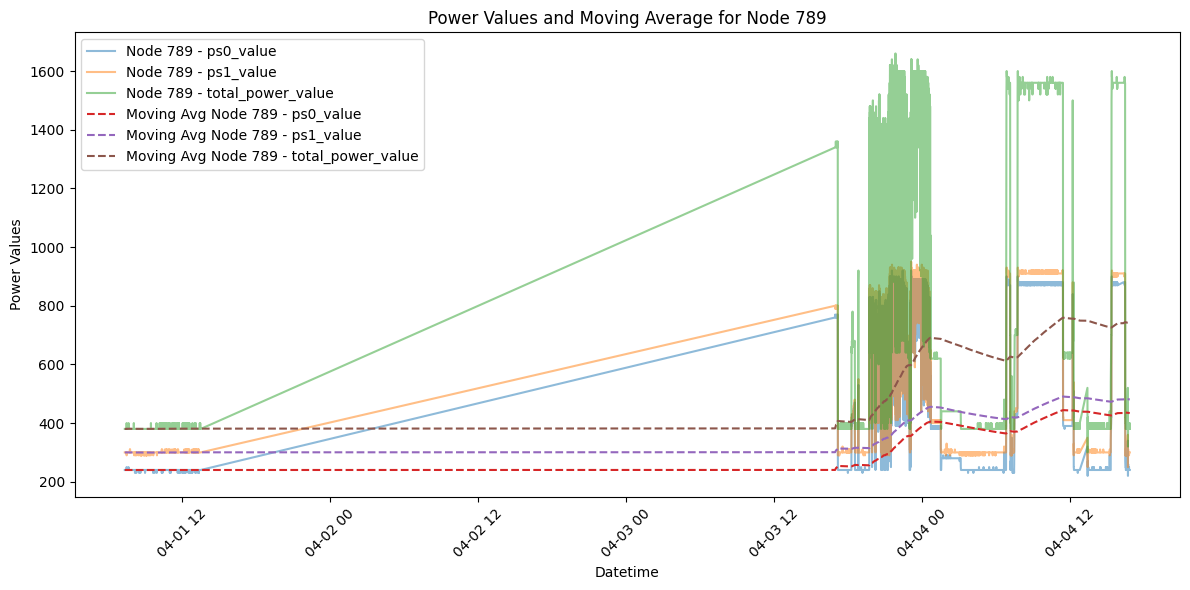

In [40]:
# Let's plot for node_id = 789
plot_power_values(df, node_id=789,windoww='1D')


**Open Data (Electricity Consumption and Carbon Footprint Analysis):**
*   Please create a list of links to (i) open data sources, (ii) code, or Git repositories related to the carbon footprint of data centers or a carbon tracker for data centers.

(i):

| Link                                                                                               | Description                                                                                                        |
|----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|
| [Open Energy Data Initiative](https://openei.org/)                                                 | U.S. Department of Energy initiative providing access to open energy data.                                       |
| [European Data Portal](https://www.europeandataportal.eu/)                                         | Platform offering access to open data from European Union countries.                                               |
| [World Bank Open Data](https://data.worldbank.org/)                                                 | Access to global development data provided by the World Bank.                                                      |
| [Open Data Institute](https://theodi.org/)                                                          | Organization promoting the use of open data to solve complex problems.                                              |
| [NASA Earthdata](https://earthdata.nasa.gov/)                                                       | Portal providing access to NASA's Earth science data.                                                              |

(ii):

| Link                                                                                               | Description                                                                                                        |
|----------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------------------------|
|  [GreenIT-Analysis](https://github.com/greenit-asp/greenit-analysis)                                 | Python library for analyzing the environmental impact of IT systems.                                                |
| [Greenhouse](https://github.com/biolab/greenhouse)                                                  | Python library for carbon accounting in computing systems.                                                         |
| [CarbonTrack](https://github.com/carbontrack/carbontrack)                                           | Tool for monitoring carbon emissions from cloud services.                                                           |
| [DataCenterCarbonFootprint](https://github.com/przemekdom/DataCenterCarbonFootprint)               | Repository for tracking the carbon footprint of data centers.                                                       |
| [CarbonAware](https://github.com/ParsonsGreenICT/CarbonAware)                                       | Framework for measuring the carbon footprint of data centers.


| Resource | Description |
|----------|-------------|
| [GEECO: Green Data Centers for Energy Optimization and Carbon Footprint Reduction](https://www.mdpi.com/2071-1050/15/21/15249) | This study proposes the implementation of the Green Energy Efficiency and Carbon Optimization (GEECO) model for enhancing energy usage within data centers, aiming at a considerable increase in energy efficiency and significant decreases in energy usage and related costs&#8203;`【oaicite:2】`&#8203;. |
| [Towards a Systematic Survey for Carbon Neutral Data Centers](https://ar5iv.labs.arxiv.org/html/2110.09284) | A comprehensive study presenting the high-level carbon flow graph in data centers throughout their life cycle, emphasizing the importance of understanding and reducing the carbon footprint in daily operations and the end-of-life disposal of equipment&#8203;`【oaicite:1】`&#8203;. |
| [Reducing Data Centers' Carbon Footprint: Strategies and Tools for Sustainability](https://www.nlyte.com) | An article discussing various strategies and tools for reducing the carbon footprint of data centers, including energy efficiency, renewable energy, DCIM (Data Center Infrastructure Management), and sustainable operations&#8203;`【oaicite:0】`&#8203;. |
| [Carbon Footprint of Data Centers & Data Storage Per Country (Calculator)](https://www.8billiontrees.com/carbon-offsets-footprint/calculating-carbon-footprint-data-centers-data-storage/) | Provides an overview of the carbon footprint associated with data centers and data storage, along with a calculator to estimate emissions based on country-specific data. This resource aims at offering insights into the impact of data centers on the environment and possible mitigation strategies. |                                                      |


**The Power Consumption of Each Node:**

https://gitlab.com/ecs-lab/exadata/-/blob/main/documentation/plugins/ipmi.md
psX_input_power  ⇒  Power consumption at the input of power supply n. X. X=0..1
To calculate the total power consumption of each compute node, please add ps0 and ps1 together.
However, the timestamps may vary. For instance, node01 for power consumption April 5, 2022 11:10:20 has two data points collected at slightly different times ps0 was collected at April 5, 2022 11:10:20.002, while ps1 was collected at April 5, 2022 11:10:20.042.
How can we combine these two power consumption values to calculate the total power consumption?
A simple answer is; we can either cancel the milliseconds or use the moving average on both P0 and P1 with the same sapmling/frequency rate. However, we should first determine the sampling rate.
What is the sampling rate for the power consumption P0 and P1 of the computing nodes? (is it 20 seconds?)

We can do the moving average computation by 1 D window.

###Working with PS0 and PS1 parquet files

####Reading the parquet files

In [41]:
# Path to our Parquet files
ps0_file_path = "/content/BigData/MyDrive/21_03/ps0.parquet"
#ps0_file_path = "/content/drive/MyDrive/21_03/ps0.parquet"
ps1_file_path = "/content/BigData/MyDrive/21_03/ps1.parquet"
#ps1_file_path = "/content/drive/MyDrive/21_03/ps1.parquet"
tot_power_file_path = "/content/BigData/MyDrive/22_04/total_power.parquet"

# Read Parquet files into a DataFrames
df_ps0 = pd.read_parquet(ps0_file_path)
df_ps1 = pd.read_parquet(ps1_file_path)
#df_tot_power = pd.read_parquet(tot_power_file_path)

####format the date time column  

In [42]:
# Convert timestamp to datetime type
df_ps0['timestamp'] = pd.to_datetime(df_ps0['timestamp'])
# Format datetime_column to remove milliseconds
df_ps0['timestamp'] = df_ps0['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [43]:
# Convert timestamp to datetime type
df_ps1['timestamp'] = pd.to_datetime(df_ps1['timestamp'])
# Format datetime_column to remove milliseconds
df_ps1['timestamp'] = df_ps1['timestamp'].dt.strftime('%Y-%m-%d %H:%M:%S')

In [44]:
# Convert formatted string back to datetime
df_ps0['timestamp'] = pd.to_datetime(df_ps0['timestamp'])
df_ps1['timestamp'] = pd.to_datetime(df_ps1['timestamp'])
#df_tot_power['timestamp'] = pd.to_datetime(df_tot_power['timestamp'])
# Display the DataFrame
display(df_ps0)
display(df_ps1)
#print(df_tot_power)

timestamp  value node
0        2021-03-02 20:45:00    450   38
1        2021-03-02 20:45:20    450   38
2        2021-03-02 20:45:40    450   38
3        2021-03-02 20:46:00    440   38
4        2021-03-02 20:46:20    440   38
...                      ...    ...  ...
10722063 2021-03-01 04:20:20    300  895
10722064 2021-03-01 04:20:40    300  895
10722065 2021-03-01 04:21:00    290  895
10722066 2021-03-01 04:21:20    300  895
10722067 2021-03-01 04:21:40    300  895

[10722068 rows x 3 columns]

timestamp  value node
0        2021-03-02 01:10:20    500   87
1        2021-03-02 01:10:40    350   87
2        2021-03-02 01:11:00    490   87
3        2021-03-02 01:11:20    490   87
4        2021-03-02 01:11:40    480   87
...                      ...    ...  ...
10710884 2021-03-01 12:10:20    390  657
10710885 2021-03-01 12:10:40    390  657
10710886 2021-03-01 12:11:00    390  657
10710887 2021-03-01 12:11:20    390  657
10710888 2021-03-01 12:11:40    390  657

[10710889 rows x 3 columns]

####merge 2 data sets

In [45]:
# Change the columns name and merge two datasets
df_ps0.rename(columns={'value': 'ps0_value'}, inplace=True)
df_ps1.rename(columns={'value': 'ps1_value'}, inplace=True)
df_ps = pd.merge(df_ps0,df_ps1, how="inner",on=["node","timestamp"])
desired_columns = ['node', 'timestamp', 'ps0_value', 'ps1_value']
df_ps = df_ps[desired_columns]
df_ps = df_ps.sort_values(by='node')

In [46]:
# Add columns 'ps0_value' and 'ps1_value' and store the result in a new column 'total_power_value'
df_ps['total_power_value'] = df_ps['ps0_value'] + df_ps['ps1_value']
display(df_ps)

node           timestamp  ps0_value  ps1_value  total_power_value
2400627    0 2021-03-02 03:14:40        240        290                530
2400943    0 2021-03-02 05:00:00        240        290                530
2400942    0 2021-03-02 04:59:40        240        290                530
2400941    0 2021-03-02 04:59:20        240        290                530
2400940    0 2021-03-02 04:59:00        240        290                530
...      ...                 ...        ...        ...                ...
2945621   99 2021-03-02 14:14:40        640        680               1320
2945620   99 2021-03-02 14:14:20        650        680               1330
2945619   99 2021-03-02 14:14:00        640        680               1320
2945649   99 2021-03-02 14:24:00        650        690               1340
4312302   99 2021-03-01 20:37:00        430        460                890

[10710889 rows x 5 columns]

####Applying moving average

Apply the moving average to the power dataset with 20 second freq (check documents of Pandas for moving average), then you will have three data points per minute. For example, there's a data point at the zero-second, followed by new data points at the 20 and 40-second.

In [47]:
def moving_average (df, node_id,windoww):

    # Step 1: Convert 'timestamp' column to datetime type
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Step 2: Filter data for the specified node
    node_data = df[df['node'] == str(node_id)]

    # Step 3: Reshape the DataFrame
    reshaped_data = node_data.pivot(index='timestamp', columns='node', values=['ps0_value', 'ps1_value', 'total_power_value'])

    # Step 4: Calculate the moving average
    moving_avg = reshaped_data.rolling(window=windoww,min_periods=1).mean()
    return moving_avg


In [48]:
# Let's plot for node_id = 789
moving_average(df_ps, node_id=789,windoww=3)


ps0_value   ps1_value total_power_value
node                        789         789               789
timestamp                                                    
2021-03-01 00:00:00  490.000000  520.000000       1010.000000
2021-03-01 00:00:20  510.000000  560.000000       1070.000000
2021-03-01 00:00:40  540.000000  583.333333       1123.333333
2021-03-01 00:01:00  563.333333  616.666667       1180.000000
2021-03-01 00:01:20  563.333333  603.333333       1166.666667
...                         ...         ...               ...
2021-03-30 14:51:20  413.333333  440.000000        853.333333
2021-03-30 14:51:40  413.333333  440.000000        853.333333
2021-03-30 14:52:00  410.000000  440.000000        850.000000
2021-03-30 14:52:20  413.333333  440.000000        853.333333
2021-03-30 14:52:40  413.333333  440.000000        853.333333

[11167 rows x 3 columns]

####Convert power consumption to energy

**How can we convert power consumption to energy in a Pandas dataframe?**
(The .cumsum() function in Pandas might be useful. Check the Pandas documentation for more information.) Or ask from ChatGPT something like
”I have a pandas dataframe with a column that represents the power consumption of a system, sampled every 20 seconds. I would like to know how to compute the energy for each sample.”

In [49]:
# Compute energy for each sample (cumulative sum of power * time)
# Time interval is 20 seconds for each sample
df_ps['ps0_energy'] = (df_ps['ps0_value'].cumsum() * 20) / 3600  # Convert time to hours (20 seconds = 20/3600 hours)
df_ps['ps1_energy'] = (df_ps['ps1_value'].cumsum() * 20) / 3600
df_ps['total_energy'] = (df_ps['total_power_value'].cumsum() * 20) / 3600
display (df_ps)

node           timestamp  ps0_value  ps1_value  total_power_value  \
2400627    0 2021-03-02 03:14:40        240        290                530   
2400943    0 2021-03-02 05:00:00        240        290                530   
2400942    0 2021-03-02 04:59:40        240        290                530   
2400941    0 2021-03-02 04:59:20        240        290                530   
2400940    0 2021-03-02 04:59:00        240        290                530   
...      ...                 ...        ...        ...                ...   
2945621   99 2021-03-02 14:14:40        640        680               1320   
2945620   99 2021-03-02 14:14:20        650        680               1330   
2945619   99 2021-03-02 14:14:00        640        680               1320   
2945649   99 2021-03-02 14:24:00        650        690               1340   
4312302   99 2021-03-01 20:37:00        430        460                890   

           ps0_energy    ps1_energy  total_energy  
2400627  1.333333e+00  1.611111e+00  2.944444e+00  
2400943  2.666667e+00  3.222222e+00  5.888889e+00  
2400942  4.000000e+00  4.833333e+00  8.833333e+00  
2400941  5.333333e+00  6.444444e+00  1.177778e+01  
2400940  6.666667e+00  8.055556e+00  1.472222e+01  
...               ...           ...           ...  
2945621  2.480864e+07  2.669036e+07  5.149900e+07  
2945620  2.480865e+07  2.669037e+07  5.149901e+07  
2945619  2.480865e+07  2.669037e+07  5.149902e+07  
2945649  2.480865e+07  2.669037e+07  5.149903e+07  
4312302  2.480865e+07  2.669038e+07  5.149903e+07  

[10710889 rows x 8 columns]

####Calculate the Operational Carbon Footprint



The operational carbon footprint is defined when computing workloads are operating on the system.
It can be calculated using the carbon intensity of the power plant that powers the system (Isys , unit: gCO2 /kWh) and the system’s operational energy (Eop , unit: kWh).
For this step, it is not necessary to consider the PUE power effectiveness.
Cop = Isys*Eop

In [50]:
IT_hourly_path = '/content/BigData/MyDrive/IT-CNO_2023_hourly.csv'

# Read the CSV file into a pandas DataFrame
df_IT = pd.read_csv(IT_hourly_path)

display(df_IT)

Datetime (UTC) Country            Zone Name Zone Id  \
0     2023-01-01 00:00:00   Italy  Central North Italy  IT-CNO   
1     2023-01-01 01:00:00   Italy  Central North Italy  IT-CNO   
2     2023-01-01 02:00:00   Italy  Central North Italy  IT-CNO   
3     2023-01-01 03:00:00   Italy  Central North Italy  IT-CNO   
4     2023-01-01 04:00:00   Italy  Central North Italy  IT-CNO   
...                   ...     ...                  ...     ...   
8755  2023-12-31 19:00:00   Italy  Central North Italy  IT-CNO   
8756  2023-12-31 20:00:00   Italy  Central North Italy  IT-CNO   
8757  2023-12-31 21:00:00   Italy  Central North Italy  IT-CNO   
8758  2023-12-31 22:00:00   Italy  Central North Italy  IT-CNO   
8759  2023-12-31 23:00:00   Italy  Central North Italy  IT-CNO   

      Carbon Intensity gCO₂eq/kWh (direct)  Carbon Intensity gCO₂eq/kWh (LCA)  \
0                                   289.39                             371.58   
1                                   289.04                             371.00   
2                                   285.15                             365.81   
3                                   281.33                             360.65   
4                                   280.82                             360.30   
...                                    ...                                ...   
8755                                232.91                             306.67   
8756                                221.81                             295.37   
8757                                221.70                             295.03   
8758                                209.99                             281.85   
8759                                200.13                             268.12   

      Low Carbon Percentage  Renewable Percentage Data Source  Data Estimated  \
0                     43.80                 38.13   entsoe.eu           False   
1                     44.25                 38.72   entsoe.eu           False   
2                     45.94                 40.21   entsoe.eu           False   
3                     47.19                 40.31   entsoe.eu           False   
4                     47.27                 40.96   entsoe.eu           False   
...                     ...                   ...         ...             ...   
8755                  49.55                 45.44   entsoe.eu           False   
8756                  51.16                 47.81   entsoe.eu           False   
8757                  51.41                 46.33   entsoe.eu           False   
8758                  53.72                 51.04   entsoe.eu           False   
8759                  56.93                 56.85   entsoe.eu           False   

     Data Estimation Method  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN  
...                     ...  
8755                    NaN  
8756                    NaN  
8757                    NaN  
8758                    NaN  
8759                    NaN  

[8760 rows x 11 columns]

###Power consumption and Carbon intensity analysis



In [51]:
Power_consumption_dataset = '//content/BigData/MyDrive/Power/power_consumption.csv'
#Power_consumption_dataset = '/content/drive/MyDrive/Power/power_consumption.csv'

# Read the CSV file into a pandas DataFrame
df_Power = pd.read_csv(Power_consumption_dataset)

display(df_Power)
df_Power['timestamp'] = pd.to_datetime(df_Power['timestamp'])
df_Power.set_index('timestamp', inplace=True)

timestamp     r205n01     r205n02     r205n03  \
0      2020-04-01 07:15:00+00:00  535.333333  554.000000  529.000000   
1      2020-04-01 07:30:00+00:00  533.111111  552.444444  529.111111   
2      2020-04-01 07:45:00+00:00  534.222222  551.333333  528.222222   
3      2020-04-01 08:00:00+00:00  532.222222  548.888889  528.000000   
4      2020-04-01 08:15:00+00:00  532.000000  549.555556  527.555556   
...                          ...         ...         ...         ...   
84493  2022-09-28 21:00:00+00:00  533.111111  541.555556  526.666667   
84494  2022-09-28 21:15:00+00:00  531.555556  541.555556  524.222222   
84495  2022-09-28 21:30:00+00:00  532.888889  540.444444  524.000000   
84496  2022-09-28 21:45:00+00:00  532.222222  541.777778  526.444444   
84497  2022-09-28 22:00:00+00:00         NaN         NaN         NaN   

          r205n04     r205n05     r205n06     r205n07     r205n08     r205n09  \
0      547.000000  580.333333  528.666667  571.333333  557.666667  580.000000   
1      548.000000  580.222222  525.555556  571.333333  558.666667  580.000000   
2      548.222222  580.444444  524.222222  568.222222  558.000000  580.222222   
3      547.777778  579.777778  526.000000  569.111111  559.111111  580.000000   
4      548.222222  579.111111  525.555556  569.777778  557.111111  580.000000   
...           ...         ...         ...         ...         ...         ...   
84493  549.555556  577.777778  519.555556  570.666667  549.777778  566.222222   
84494  549.111111  573.111111  520.666667  569.777778  550.222222  565.111111   
84495  550.444444  574.444444  520.222222  568.444444  549.777778  567.777778   
84496  550.888889  572.444444  520.888889  569.111111  547.111111  564.888889   
84497         NaN         NaN         NaN         NaN         NaN         NaN   

       ...      r256n11      r256n12      r256n13      r256n14     r256n15  \
0      ...   510.666667   524.666667   530.000000   525.666667  519.333333   
1      ...   511.111111   522.888889   529.777778   526.666667  518.222222   
2      ...   510.666667   522.888889   529.777778   526.444444  518.444444   
3      ...   510.000000   523.333333   528.666667   525.333333  518.000000   
4      ...   510.888889   521.333333   527.333333   525.777778  517.111111   
...    ...          ...          ...          ...          ...         ...   
84493  ...  1213.555556  1151.777778  1176.888889  1588.000000  639.555556   
84494  ...  1207.777778   949.333333  1172.444444  1578.888889  637.777778   
84495  ...  1198.000000   678.888889  1183.777778  1613.777778  637.777778   
84496  ...  1200.444444   666.888889  1172.000000  1563.111111  606.000000   
84497  ...          NaN          NaN          NaN          NaN         NaN   

           r256n16     r256n17      r256n18      r256n19      r256n20  
0       528.333333  521.612903   559.666667   535.806452   523.666667  
1       528.666667  520.444444   558.222222   537.111111   523.111111  
2       527.777778  522.666667   558.222222   536.666667   524.666667  
3       528.000000  522.000000   557.777778   536.444444   524.222222  
4       528.000000  521.111111   557.333333   535.333333   525.333333  
...            ...         ...          ...          ...          ...  
84493  1192.666667  643.777778  1187.777778  1198.666667  1236.444444  
84494  1196.888889  641.555556   991.777778  1194.888889  1053.333333  
84495  1191.111111  626.222222   720.000000  1198.222222   624.666667  
84496  1195.111111  605.333333   698.666667  1196.666667   910.444444  
84497          NaN         NaN          NaN          NaN          NaN  

[84498 rows x 981 columns]

####Creating subplots for power consumption.

#####function for plotting a particular node from a particular rack

This function takes as input:

*   df : The dataframe
*   racks : range of racks to select nodes from. (define the input using range() function)
*   nodes : range of nodes to plot the power consumption. (define the input using range() function)
*   window_size : Size of the moving average window.
*   start_date and end_date: are the date margins. The format is the following: start_date = '2021-01-01 00:00:00+00:00'  
end_date = '2021-03-31 00:00:00+00:00'
*   plots_to_display can have following values:
      "data" -> only the original data will be plotted.
      "movingavrg" -> only the moving average will be plotted.
      "data_and_movingavrg" -> both original data and the moving average will be plotted.




In [52]:
def node_power_plotter(df, racks, nodes,window_size ,start_date,end_date,plots_to_display="data"):
  '''
  plots_to_display can have following values:
      "data" -> only the original data will be plotted.
      "movingavrg" -> only the moving average will be plotted.
      "data_and_movingavrg" -> both original data and the moving average will be plotted.

  '''
  import matplotlib.pyplot as plt

  plt.figure(figsize=(15, 6))  # Adjust figure size as needed
  # window_size = '1D'  # Adjust window size as needed
  # start_date = '2021-01-01 00:00:00+00:00'
  # end_date = '2021-03-31 00:00:00+00:00'

  for rack in racks:
    for node in nodes:
      node_name = f"r{str(rack).zfill(3)}n{str(node).zfill(2)}"
      filtered_data = df.loc[start_date:end_date, node_name]

      if plots_to_display ==  "data" or plots_to_display ==  "data_and_movingavrg":
        plt.plot(filtered_data.index, filtered_data, label= node_name)

      if plots_to_display ==  "movingavrg" or plots_to_display ==  "data_and_movingavrg":
        moving_avg = filtered_data.rolling(window=window_size).mean()
        plt.plot(filtered_data.index, moving_avg, linestyle='--', label=f'{node_name} (Moving Avg)')



  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.title('Plot of Columns Based on Timestamps')
  # plt.legend()
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=2)
  plt.tight_layout()
  plt.show()


#####node 1 and node 20 of rack 205, 1 month; January 2021

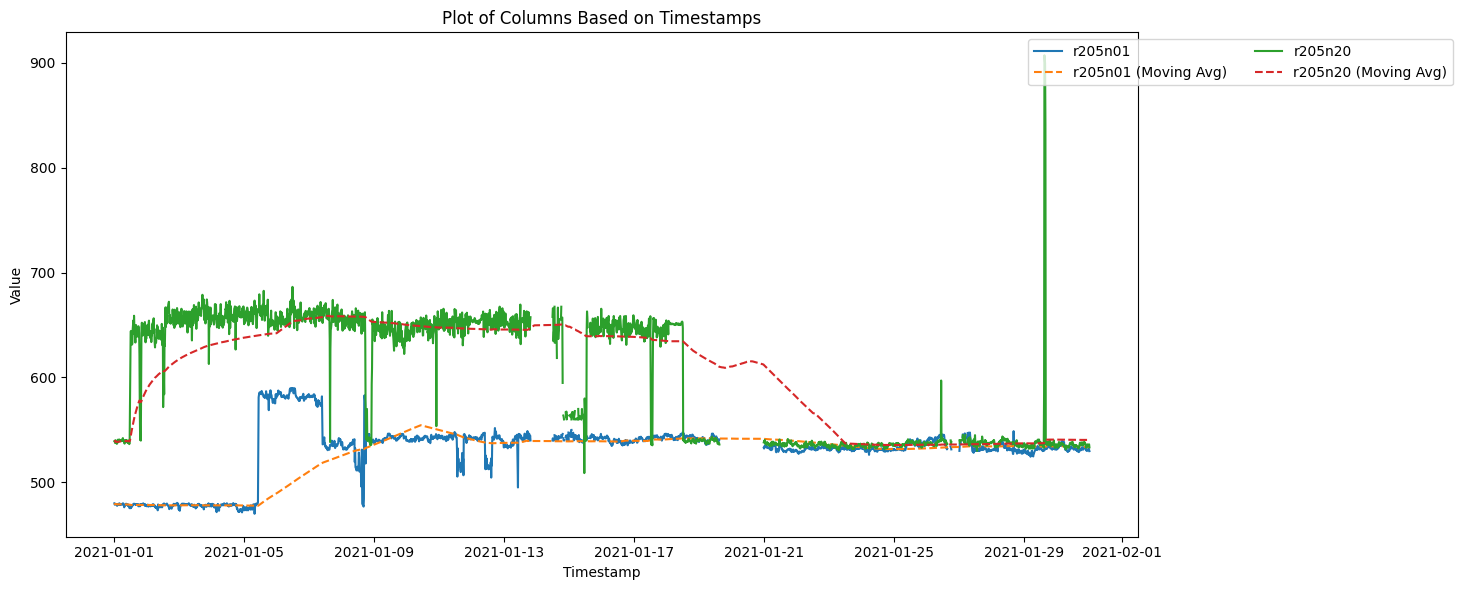

In [53]:
plots_to_display_1 =  "data_and_movingavrg"
# plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(205,206)
nodes_1 = range (1,21,19) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

Node 1 consumes less power. because:

- Node 1 is closer to the ground and would be cooler.
- Node 20 is in higher position in the rack and has higher temperature, therefore it consumes more power.

#####node 1 of rack 205 and rack 206, 1 month; January 2021

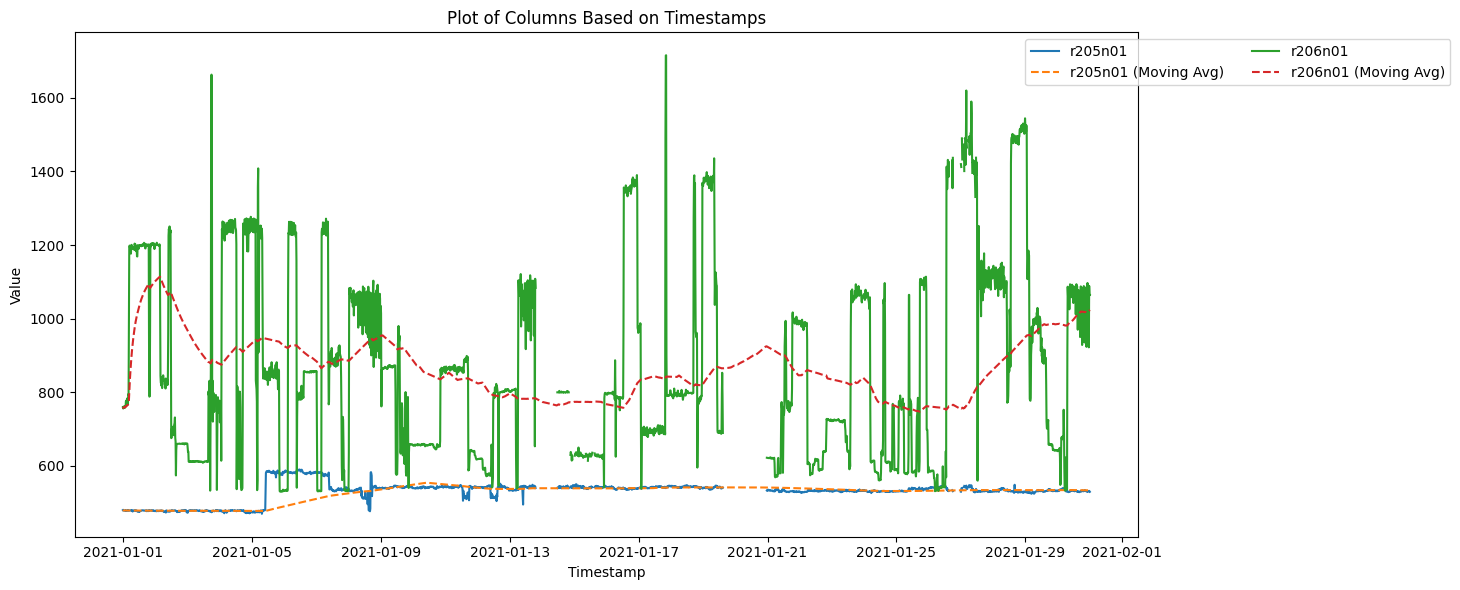

In [54]:
plots_to_display_2 =  "data_and_movingavrg"
window_size_2 = '5D'
start_date_2 = '2021-01-01 00:00:00+00:00'
end_date_2 = '2021-1-31 00:00:00+00:00'
racks_2 = range(205,207)
nodes_2 = range (1,2) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_2, nodes_2,window_size_2 ,start_date_2,end_date_2,plots_to_display_2)

In [55]:
range(205,2)

range(205, 2)

#####all nodes of rack 250, 1 month; January 2021

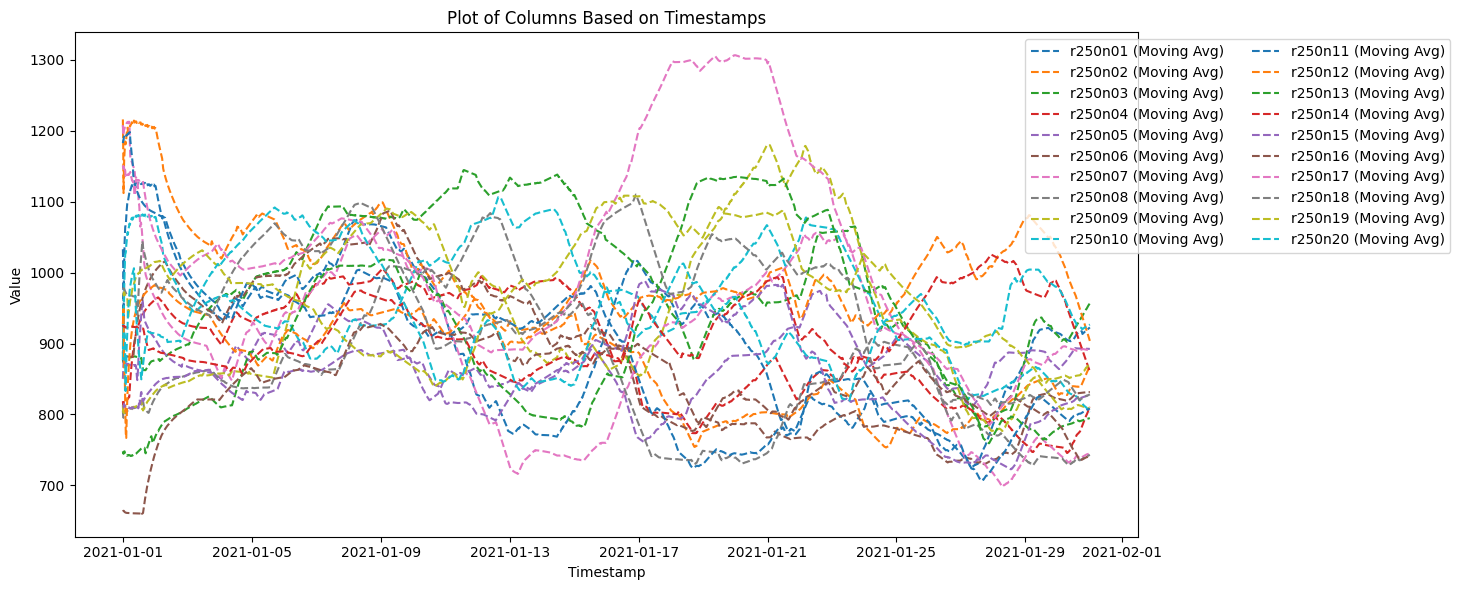

In [56]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(250,251)
nodes_1 = range (1,21) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

Since the plot is not readable, we change the number of nodes.

#####nodes 1,10,19 and 20 of rack rack 250, 1 month; January 2021

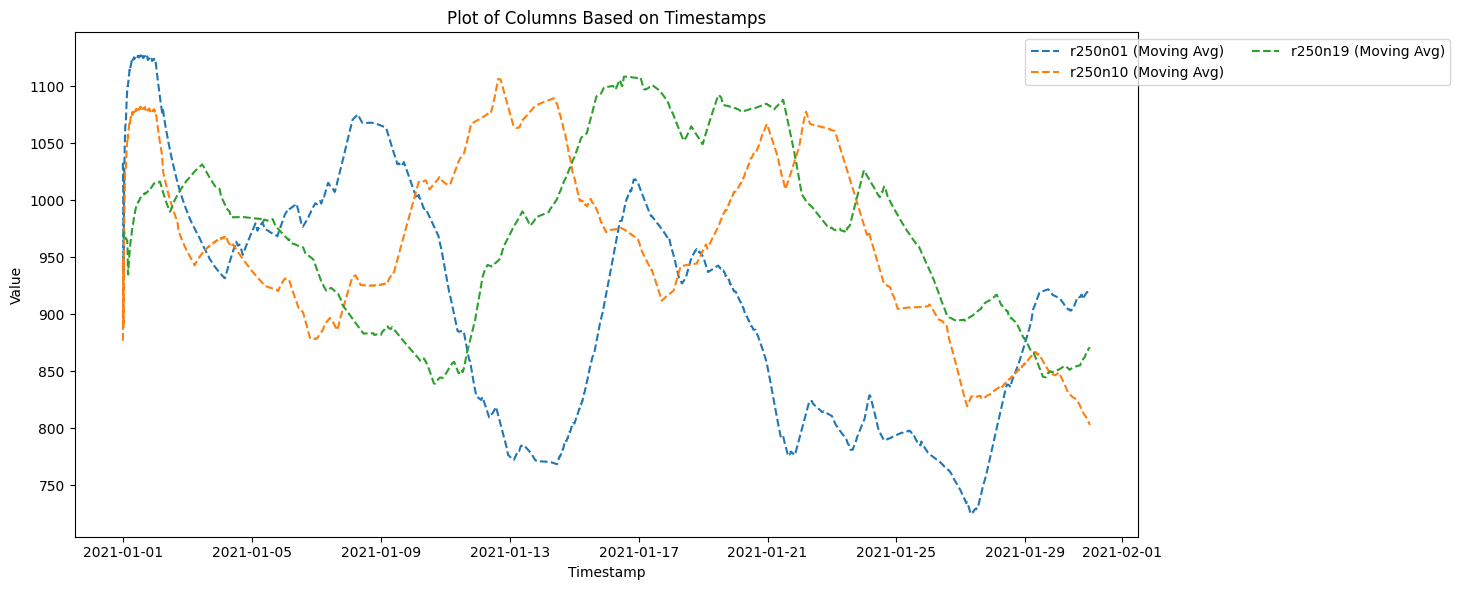

In [57]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(250,251)
nodes_1 = range (1,21,9) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

again no useful data is being seen in this plot.

#####nodes 1,10,19 of rack 232, 1 month; January 2021

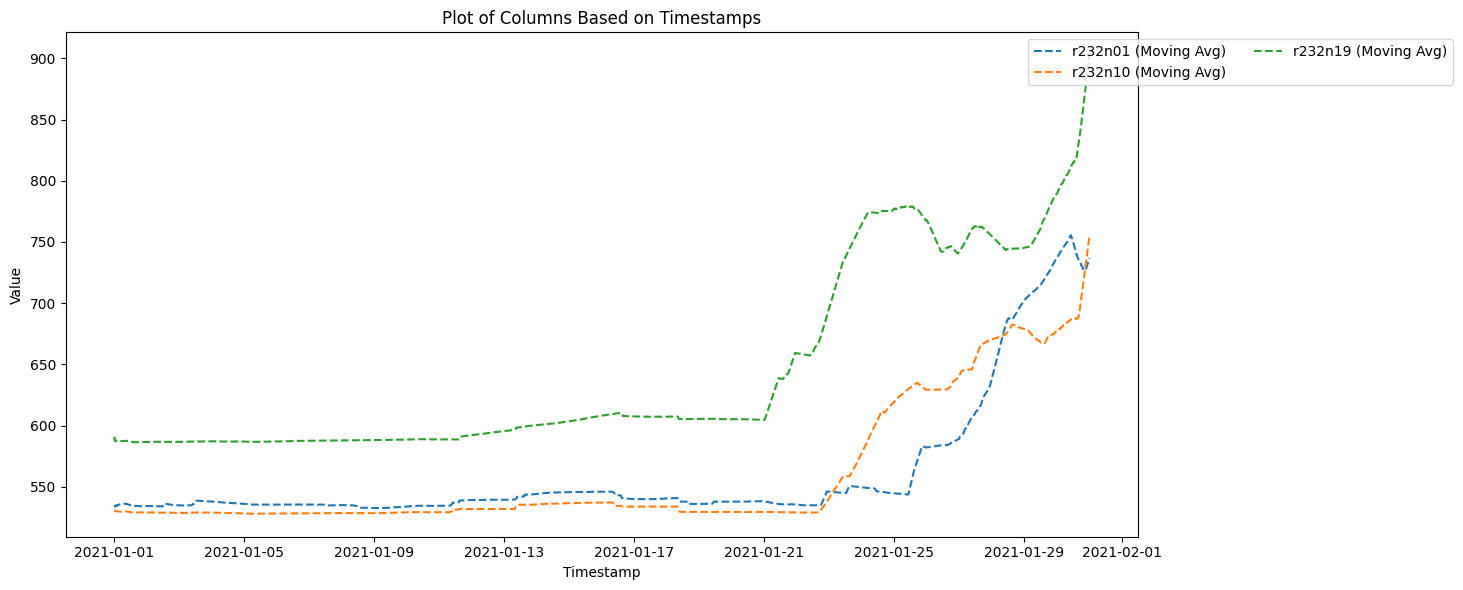

In [58]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(232,233)
nodes_1 = range (1,21,9) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

#####node 1 of all racks, 1 month; January 2021

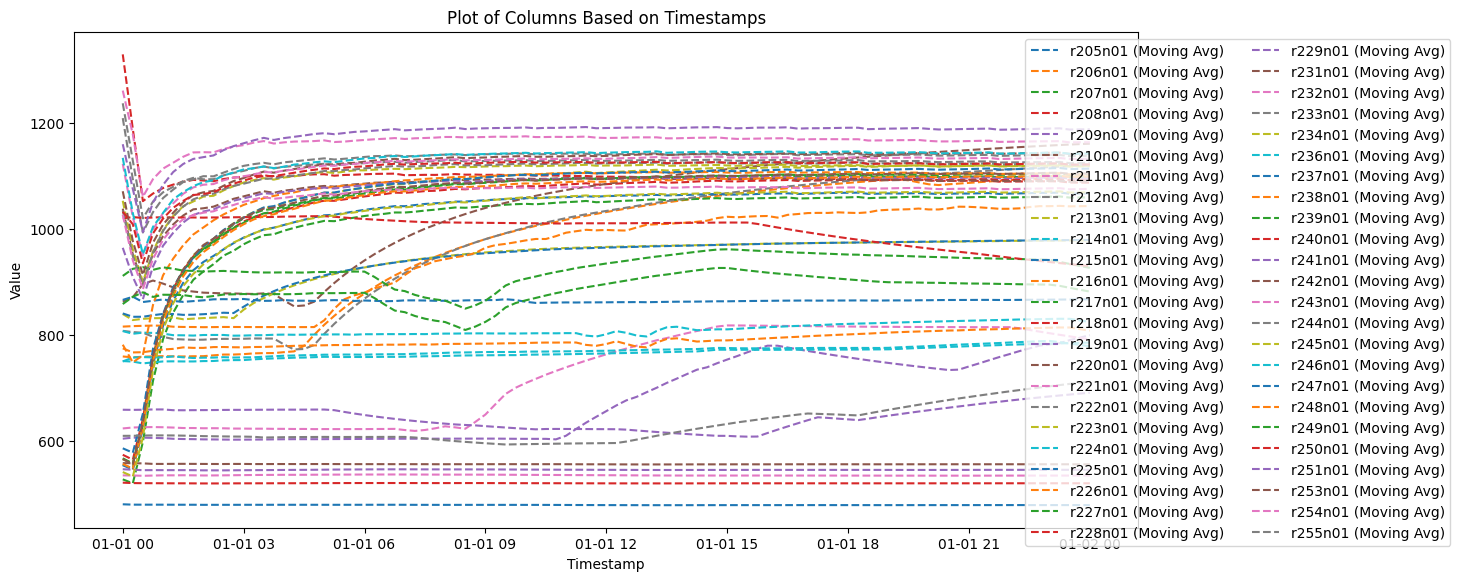

In [59]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '10D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-01-02 00:00:00+00:00'
racks_1 = np.array (range(205,256))
#remove non existing racks
elements_to_remove = [230, 235, 252]
mask = np.ones(racks_1.shape, dtype=bool)
for element in elements_to_remove:
    mask &= racks_1 != element
racks_new = racks_1[mask]

nodes_1 = range (1,2) #This takes rack 1 and 20
node_power_plotter(df_Power, racks_new, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

####Calculation of Carbon footprint

Power to energy coversion

In [60]:
time_interval_seconds = 15 * 60
df_energy = pd.DataFrame()

# # Loop through each column (node) in the original DataFrame
# for column in df_Power.columns:
#     # Compute energy consumption for the current node
#     energy_consumption = df_Power[column] * time_interval_seconds / 3600  # Converting seconds to hours

#     # Add the energy consumption as a new column to the energy DataFrame
#     df_energy[column + '_energy'] = energy_consumption

energy_df = pd.concat([df_Power[column] * time_interval_seconds / 3600 for column in df_Power.columns], axis=1)
energy_df.columns = [f"{col}_energy" for col in df_Power.columns]


# Display the new DataFrame with energy consumption for each node
display(energy_df)

r205n01_energy  r205n02_energy  r205n03_energy  \
timestamp                                                                   
2020-04-01 07:15:00+00:00      133.833333      138.500000      132.250000   
2020-04-01 07:30:00+00:00      133.277778      138.111111      132.277778   
2020-04-01 07:45:00+00:00      133.555556      137.833333      132.055556   
2020-04-01 08:00:00+00:00      133.055556      137.222222      132.000000   
2020-04-01 08:15:00+00:00      133.000000      137.388889      131.888889   
...                                   ...             ...             ...   
2022-09-28 21:00:00+00:00      133.277778      135.388889      131.666667   
2022-09-28 21:15:00+00:00      132.888889      135.388889      131.055556   
2022-09-28 21:30:00+00:00      133.222222      135.111111      131.000000   
2022-09-28 21:45:00+00:00      133.055556      135.444444      131.611111   
2022-09-28 22:00:00+00:00             NaN             NaN             NaN   

                           r205n04_energy  r205n05_energy  r205n06_energy  \
timestamp                                                                   
2020-04-01 07:15:00+00:00      136.750000      145.083333      132.166667   
2020-04-01 07:30:00+00:00      137.000000      145.055556      131.388889   
2020-04-01 07:45:00+00:00      137.055556      145.111111      131.055556   
2020-04-01 08:00:00+00:00      136.944444      144.944444      131.500000   
2020-04-01 08:15:00+00:00      137.055556      144.777778      131.388889   
...                                   ...             ...             ...   
2022-09-28 21:00:00+00:00      137.388889      144.444444      129.888889   
2022-09-28 21:15:00+00:00      137.277778      143.277778      130.166667   
2022-09-28 21:30:00+00:00      137.611111      143.611111      130.055556   
2022-09-28 21:45:00+00:00      137.722222      143.111111      130.222222   
2022-09-28 22:00:00+00:00             NaN             NaN             NaN   

                           r205n07_energy  r205n08_energy  r205n09_energy  \
timestamp                                                                   
2020-04-01 07:15:00+00:00      142.833333      139.416667      145.000000   
2020-04-01 07:30:00+00:00      142.833333      139.666667      145.000000   
2020-04-01 07:45:00+00:00      142.055556      139.500000      145.055556   
2020-04-01 08:00:00+00:00      142.277778      139.777778      145.000000   
2020-04-01 08:15:00+00:00      142.444444      139.277778      145.000000   
...                                   ...             ...             ...   
2022-09-28 21:00:00+00:00      142.666667      137.444444      141.555556   
2022-09-28 21:15:00+00:00      142.444444      137.555556      141.277778   
2022-09-28 21:30:00+00:00      142.111111      137.444444      141.944444   
2022-09-28 21:45:00+00:00      142.277778      136.777778      141.222222   
2022-09-28 22:00:00+00:00             NaN             NaN             NaN   

                           r205n10_energy  ...  r256n11_energy  \
timestamp                                  ...                   
2020-04-01 07:15:00+00:00      135.333333  ...      127.666667   
2020-04-01 07:30:00+00:00      135.000000  ...      127.777778   
2020-04-01 07:45:00+00:00      135.166667  ...      127.666667   
2020-04-01 08:00:00+00:00      135.166667  ...      127.500000   
2020-04-01 08:15:00+00:00      134.944444  ...      127.722222   
...                                   ...  ...             ...   
2022-09-28 21:00:00+00:00      134.555556  ...      303.388889   
2022-09-28 21:15:00+00:00      134.444444  ...      301.944444   
2022-09-28 21:30:00+00:00      134.277778  ...      299.500000   
2022-09-28 21:45:00+00:00      133.555556  ...      300.111111   
2022-09-28 22:00:00+00:00             NaN  ...             NaN   

                           r256n12_energy  r256n13_energy  r256n14_energy  \
timestamp                                                                   
2020-04-

Cop = Isys * Eop

In [61]:
IT_hourly_path = '/content/BigData/MyDrive/IT-CNO_2021_hourly.csv'
#T_hourly_path = '/content/drive/MyDrive/IT-CNO_2021_hourly.csv'

# Read the CSV file into a pandas DataFrame
# isys_df = pd.read_csv(IT_hourly_path)
isys_df = pd.read_csv(IT_hourly_path, parse_dates=['Datetime (UTC)'], index_col='Datetime (UTC)')


# Filter Isys data for the year 2021
isys_df_2021 = isys_df[isys_df.index.year == 2021]


# Make Isys index timezone-naive
isys_df_2021.index = isys_df_2021.index.tz_localize(None)
energy_df.index = energy_df.index.tz_localize(None)
energy_df_2021 = energy_df[energy_df.index.year == 2021]


# Resample Isys data to align with the timestamp of Eop
# Resample Isys data to 15-minute intervals, summing the hourly values
resampled_isys = isys_df_2021.resample('15T').asfreq()
# print (resampled_isys.info())
# Forward-fill missing values in Isys to fill the NaNs resulting from resampling
resampled_isys = resampled_isys.ffill()




cop_df = pd.DataFrame()

cop_df = pd.concat([energy_df_2021[column] * resampled_isys['Carbon Intensity gCO₂eq/kWh (direct)']  for column in energy_df_2021.columns], axis=1)
cop_df.columns = [col.replace('_energy', '_COP') for col in energy_df.columns]
cop_df.index = cop_df.index.tz_localize('UTC')

display(cop_df)

r205n01_COP   r205n02_COP   r205n03_COP  \
2021-01-01 00:00:00+00:00  30189.600000  35011.550000  33404.233333   
2021-01-01 00:15:00+00:00  30105.740000  35095.410000  33334.350000   
2021-01-01 00:30:00+00:00  30133.693333  35025.526667  33432.186667   
2021-01-01 00:45:00+00:00  30147.670000  34997.573333  33446.163333   
2021-01-01 01:00:00+00:00  31127.848889  36166.633333  34535.164444   
...                                 ...           ...           ...   
2021-12-31 22:45:00+00:00  26542.638889  28040.833333  26542.638889   
2021-12-31 23:00:00+00:00  28080.543333  29478.056667  28056.856667   
2021-12-31 23:15:00+00:00           NaN           NaN           NaN   
2021-12-31 23:30:00+00:00           NaN           NaN           NaN   
2021-12-31 23:45:00+00:00           NaN           NaN           NaN   

                            r205n04_COP   r205n05_COP   r205n06_COP  \
2021-01-01 00:00:00+00:00  34927.690000  37010.213333  32873.120000   
2021-01-01 00:15:00+00:00  34997.573333  37024.190000  32845.166667   
2021-01-01 00:30:00+00:00  35053.480000  37094.073333  32831.190000   
2021-01-01 00:45:00+00:00  34913.713333  36940.330000  32789.260000   
2021-01-01 01:00:00+00:00  35935.628889  38202.360000  34000.966667   
...                                 ...           ...           ...   
2021-12-31 22:45:00+00:00   1006.250000  29326.597222  26296.666667   
2021-12-31 23:00:00+00:00   1065.900000  30911.100000  27725.243333   
2021-12-31 23:15:00+00:00           NaN           NaN           NaN   
2021-12-31 23:30:00+00:00           NaN           NaN           NaN   
2021-12-31 23:45:00+00:00           NaN           NaN           NaN   

                            r205n07_COP   r205n08_COP   r205n09_COP  \
2021-01-01 00:00:00+00:00  36129.683333  35179.270000  36479.100000   
2021-01-01 00:15:00+00:00  36241.496667  35109.386667  36479.100000   
2021-01-01 00:30:00+00:00  36017.870000  35053.480000  36423.193333   
2021-01-01 00:45:00+00:00  36115.706667  35081.433333  36493.076667   
2021-01-01 01:00:00+00:00  37422.720000  36108.882222  37711.475556   
...                                 ...           ...           ...   
2021-12-31 22:45:00+00:00  28700.486111  27649.513889  28420.972222   
2021-12-31 23:00:00+00:00  30413.680000  29288.563333  30011.006667   
2021-12-31 23:15:00+00:00           NaN           NaN           NaN   
2021-12-31 23:30:00+00:00           NaN           NaN           NaN   
2021-12-31 23:45:00+00:00           NaN           NaN           NaN   

                            r205n10_COP  ...   r256n11_COP   r256n12_COP  \
2021-01-01 00:00:00+00:00  34745.993333  ...  47842.130000  37499.396667   
2021-01-01 00:15:00+00:00  34620.203333  ...  46779.903333  37723.023333   
2021-01-01 00:30:00+00:00  34564.296667  ...  47716.340000  37625.186667   
2021-01-01 00:45:00+00:00  34578.273333  ...  48373.243333  37709.046667   
2021-01-01 01:00:00+00:00  35704.624444  ...  49189.508889  38953.124444   
...                                 ...  ...           ...           ...   
2021-12-31 22:45:00+00:00  26732.708333  ...  39534.444444  32501.875000   
2021-12-31 23:00:00+00:00  28270.036667  ...  41806.966667  34369.353333   
2021-12-31 23:15:00+00:00           NaN  ...           NaN           NaN   
2021-12-31 23:30:00+00:00           NaN  ...           NaN           NaN   
2021-12-31 23:45:00+00:00           NaN  ...           NaN           NaN   

                            r256n13_COP   r256n14_COP   r256n15_COP  \
2021-01-01 00:00:00+00:00  40224.846667  41678.420000  37136.003333   
2021-01-01 00:15:00+00:00  40224.846667  41650.466667  37177.933333   
2021-01-01 00:30:00+00:00  40392.566667  41636.490000  37303.723333   
2021-01-01 00:45:00+00:00  40308.706667  41650.466667  37345.653333   
2021-01-01 01:00:00+00:00  41782.928889  43125.642222  38577.742222   
...                                 ...           ...           ...   
2021-12-31 22:45:00+00:00  39400.277778  60598.611111  4402

Summing all nodes cop together

In [62]:
cop_sum = pd.DataFrame()
cop_sum = cop_df.sum(axis=1)
display (cop_sum)

2021-01-01 00:00:00+00:00    4.756363e+07
2021-01-01 00:15:00+00:00    4.718579e+07
2021-01-01 00:30:00+00:00    4.812283e+07
2021-01-01 00:45:00+00:00    4.984151e+07
2021-01-01 01:00:00+00:00    5.143832e+07
                                 ...     
2021-12-31 22:45:00+00:00    3.906124e+07
2021-12-31 23:00:00+00:00    4.169339e+07
2021-12-31 23:15:00+00:00    0.000000e+00
2021-12-31 23:30:00+00:00    0.000000e+00
2021-12-31 23:45:00+00:00    0.000000e+00
Length: 35040, dtype: float64

####Plotting carbon footprints

#####Function for plotting COP

This function takes as input:

*   df : The dataframe
*   racks : range of racks to select nodes from. (define the input using range() function)
*   nodes : range of nodes to plot the power consumption. (define the input using range() function)
*   window_size : Size of the moving average window.
*   start_date and end_date: are the date margins. The format is the following: start_date = '2021-01-01 00:00:00+00:00'  
end_date = '2021-03-31 00:00:00+00:00'
*   plots_to_display can have following values:
      "data" -> only the original data will be plotted.
      "movingavrg" -> only the moving average will be plotted.
      "data_and_movingavrg" -> both original data and the moving average will be plotted.




In [63]:
def node_cop_plotter(df, racks, nodes,window_size ,start_date,end_date,plots_to_display="data"):
  '''
  plots_to_display can have following values:
      "data" -> only the original data will be plotted.
      "movingavrg" -> only the moving average will be plotted.
      "data_and_movingavrg" -> both original data and the moving average will be plotted.

  '''
  # Assuming df is your DataFrame



  import matplotlib.pyplot as plt

  plt.figure(figsize=(15, 6))  # Adjust figure size as needed
  # window_size = '1D'  # Adjust window size as needed
  # start_date = '2021-01-01 00:00:00+00:00'
  # end_date = '2021-03-31 00:00:00+00:00'

  for rack in racks:
    for node in nodes:
      node_name = f"r{str(rack).zfill(3)}n{str(node).zfill(2)}_COP"
      filtered_data = df.loc[start_date:end_date, node_name]

      if plots_to_display ==  "data" or plots_to_display ==  "data_and_movingavrg":
        plt.plot(filtered_data.index, filtered_data, label= node_name)

      if plots_to_display ==  "movingavrg" or plots_to_display ==  "data_and_movingavrg":
        moving_avg = filtered_data.rolling(window=window_size).mean()
        plt.plot(filtered_data.index, moving_avg, linestyle='--', label=f'{node_name} (Moving Avg)')



  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.title('Plot of Columns Based on Timestamps')
  # plt.legend()
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=2)
  plt.tight_layout()
  plt.show()


#####node 1 and node 20 of rack 205, 1 year

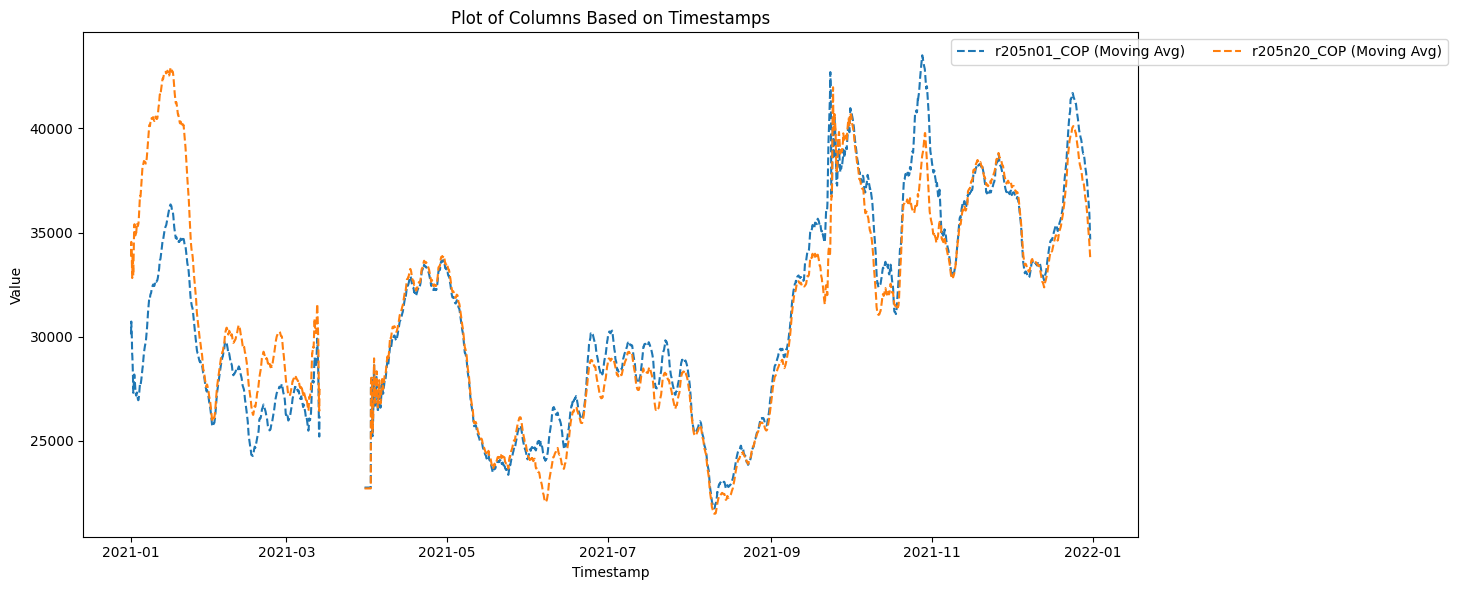

In [64]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
# window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-12-31 00:00:00+00:00'
racks_1 = range(205,206)
nodes_1 = range (1,21,19) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

Node 1 consumes less power. because:

- Node 1 is closer to the ground and would be cooler.
- Node 20 is in higher position in the rack and has higher temperature, therefore it consumes more power.

#####node 1 and node 20 of rack 205, 1 month; January 2021

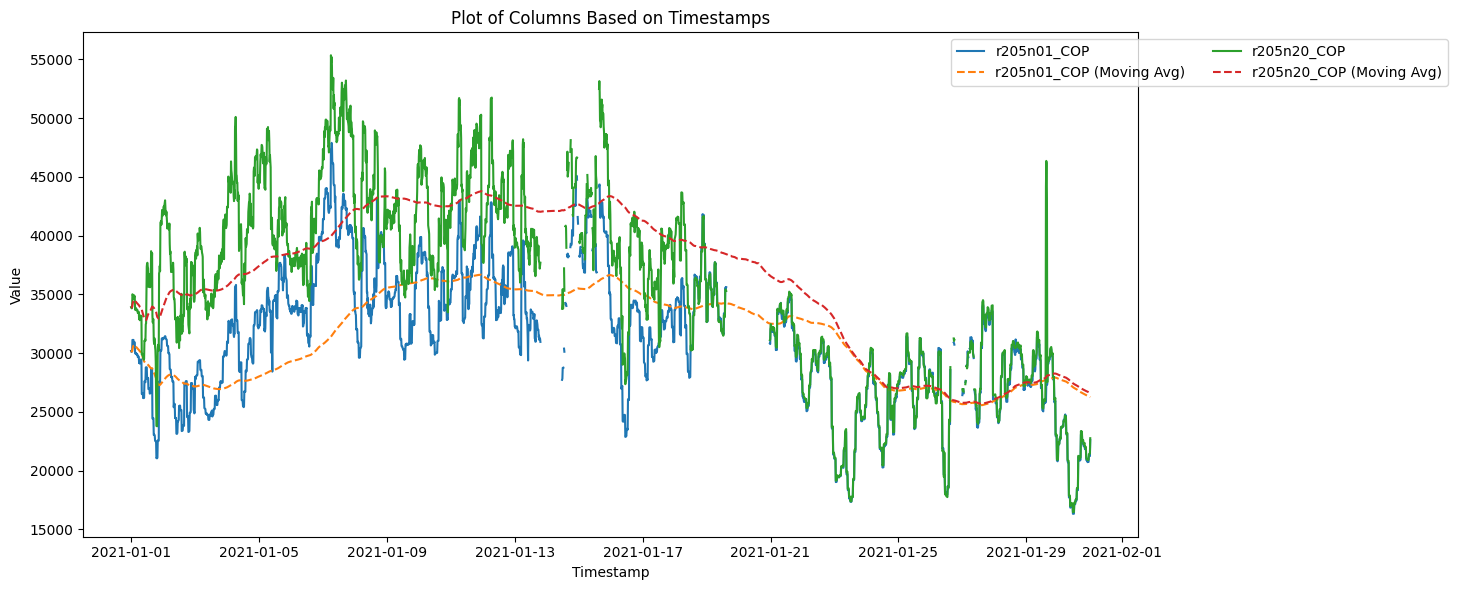

In [65]:
plots_to_display_1 =  "data_and_movingavrg"
# plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(205,206)
nodes_1 = range (1,21,19) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

Node 1 consumes less power. because:

- Node 1 is closer to the ground and would be cooler.
- Node 20 is in higher position in the rack and has higher temperature, therefore it consumes more power.

#####node 1 of rack 205 and rack 206, 1 month; January 2021

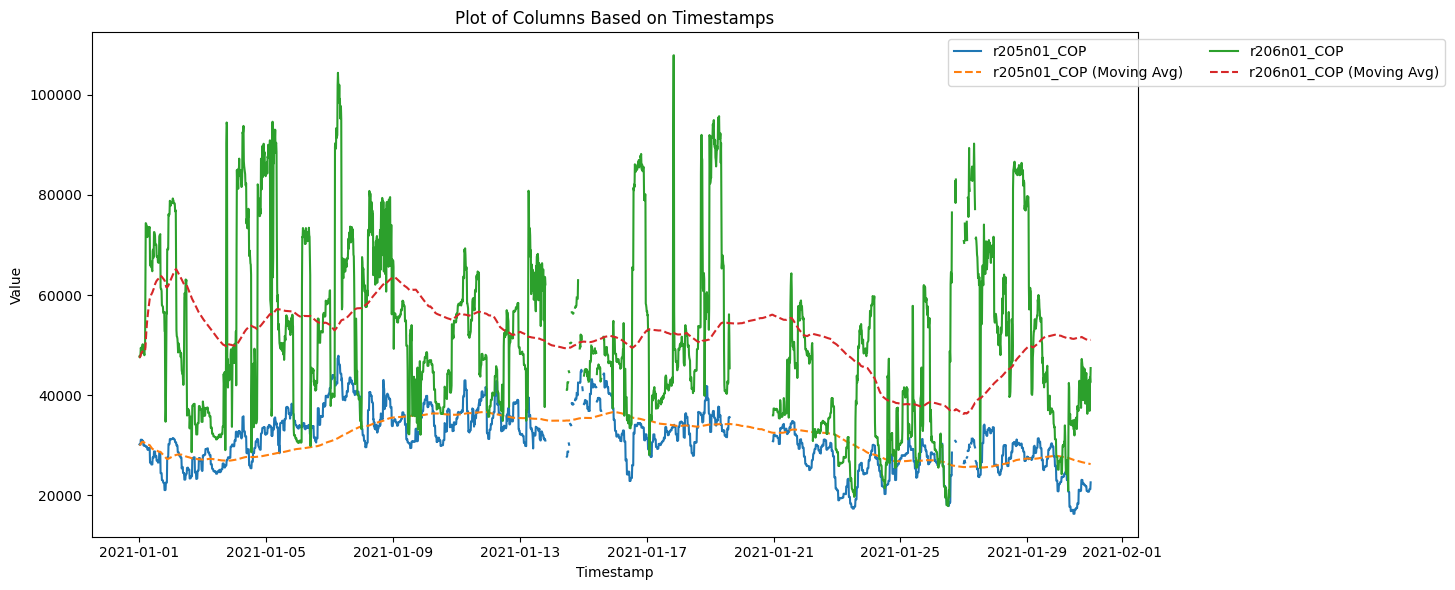

In [66]:
plots_to_display_2 =  "data_and_movingavrg"
window_size_2 = '5D'
start_date_2 = '2021-01-01 00:00:00+00:00'
end_date_2 = '2021-1-31 00:00:00+00:00'
racks_2 = range(205,207)
nodes_2 = range (1,2) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_2, nodes_2,window_size_2 ,start_date_2,end_date_2,plots_to_display_2)

#####all nodes of rack 250, 1 month; January 2021

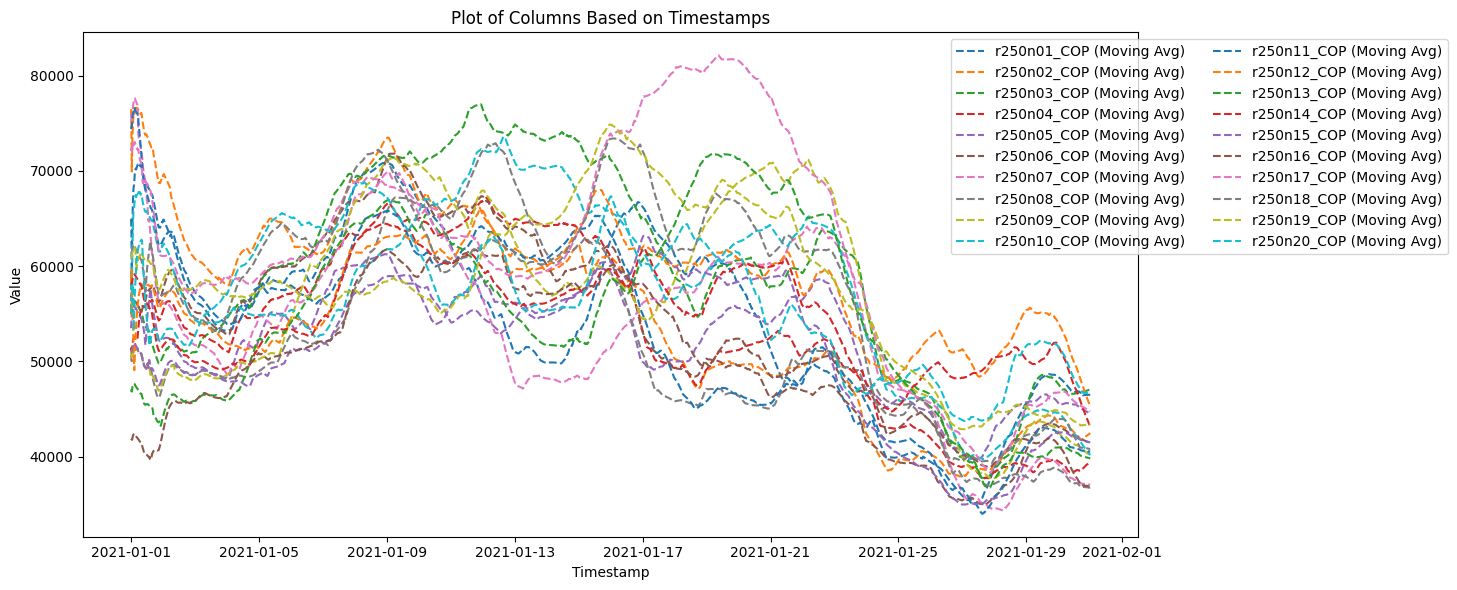

In [67]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(250,251)
nodes_1 = range (1,21) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

Since the plot is not readable, we change the number of nodes.

#####nodes 1,10,19 and 20 of rack rack 250, 1 month; January 2021

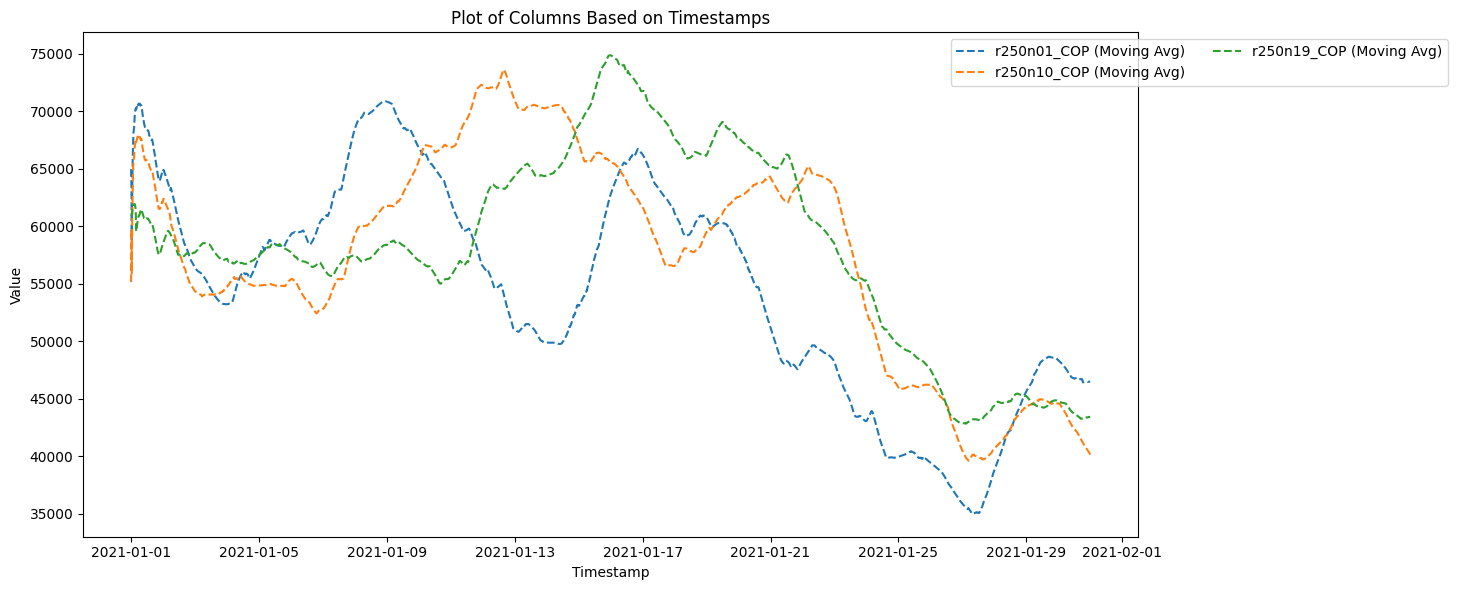

In [68]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(250,251)
nodes_1 = range (1,21,9) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

again no useful data is being seen in this plot.

#####nodes 1,10,19 of rack 232, 1 month; January 2021

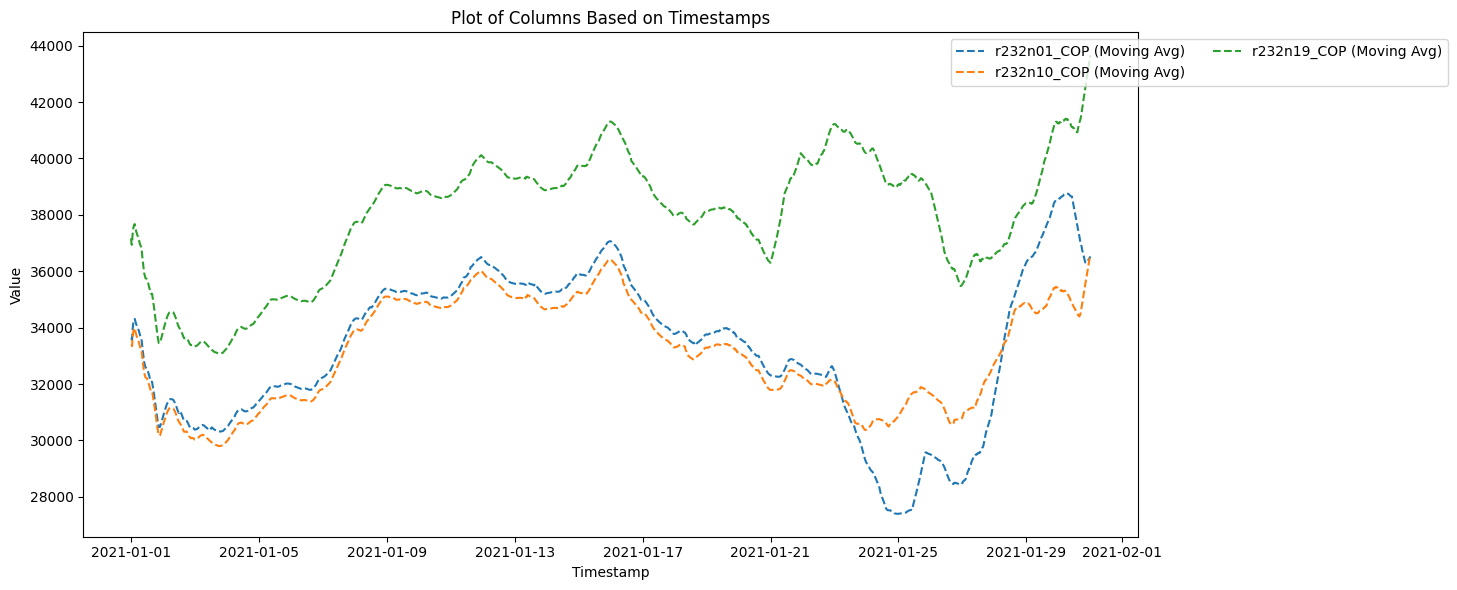

In [69]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '5D'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-1-31 00:00:00+00:00'
racks_1 = range(232,233)
nodes_1 = range (1,21,9) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_1, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

#####node 1 of all racks, 1 day; 2021-01-01

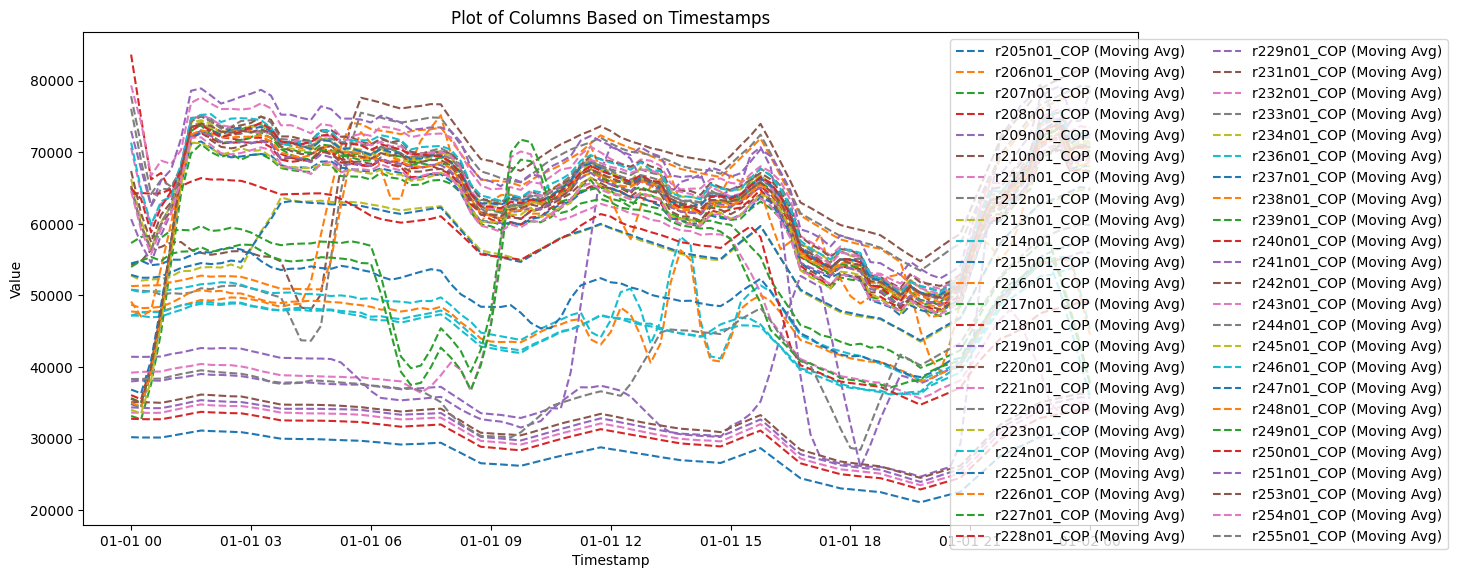

In [70]:
# plots_to_display_1 =  "data_and_movingavrg"
plots_to_display_1 =  "movingavrg"
window_size_1 = '1H'
start_date_1 = '2021-01-01 00:00:00+00:00'
end_date_1 = '2021-01-02 00:00:00+00:00'
racks_1 = np.array (range(205,256))
#remove non existing racks
elements_to_remove = [230, 235, 252]
mask = np.ones(racks_1.shape, dtype=bool)
for element in elements_to_remove:
    mask &= racks_1 != element
racks_new = racks_1[mask]

nodes_1 = range (1,2) #This takes rack 1 and 20
node_cop_plotter(cop_df, racks_new, nodes_1,window_size_1 ,start_date_1,end_date_1,plots_to_display_1)

#####COP of all nodes summed up

######function for plotting

In [71]:
def allnodes_cop_plotter(df, window_size, start_date, end_date, plots_to_display):
  import matplotlib.pyplot as plt

  plt.figure(figsize=(15, 6))  # Adjust figure size as needed
  # window_size = '1H'  # Adjust window size as needed
  # start_date = '2021-08-01 00:00:00+00:00'
  # end_date = '2021-08-02 00:00:00+00:00'
  # plots_to_display = "data_and_movingavrg"
  # plots_to_display = "movingavrg"

  filtered_data = df.loc[start_date:end_date]

  if plots_to_display ==  "data" or plots_to_display ==  "data_and_movingavrg":
    plt.plot(filtered_data.index, filtered_data, label= "all nodes COP")

  if plots_to_display ==  "movingavrg" or plots_to_display ==  "data_and_movingavrg":
    moving_avg = filtered_data.rolling(window=window_size).mean()
    plt.plot(filtered_data.index, moving_avg, linestyle='--', label= "all nodes COP Moving Avg")



  plt.xlabel('Timestamp')
  plt.ylabel('Value')
  plt.title('Plot of Columns Based on Timestamps')
  # plt.legend()
  plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), ncol=2)
  plt.tight_layout()
  plt.show()


######Plots

one day August first

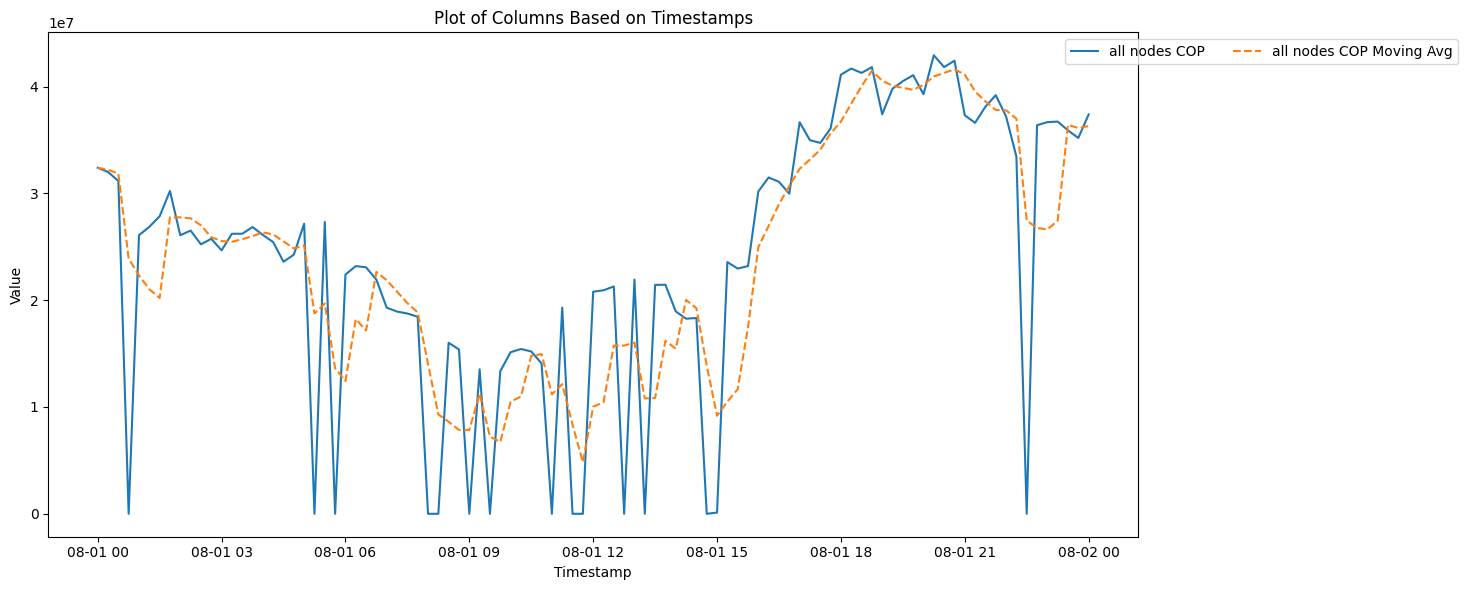

In [72]:
window_size = '1H'  # Adjust window size as needed
start_date = '2021-08-01 00:00:00+00:00'
end_date = '2021-08-02 00:00:00+00:00'
plots_to_display = "data_and_movingavrg"
# plots_to_display = "movingavrg"
allnodes_cop_plotter (cop_sum, window_size, start_date, end_date, plots_to_display)

one day January first

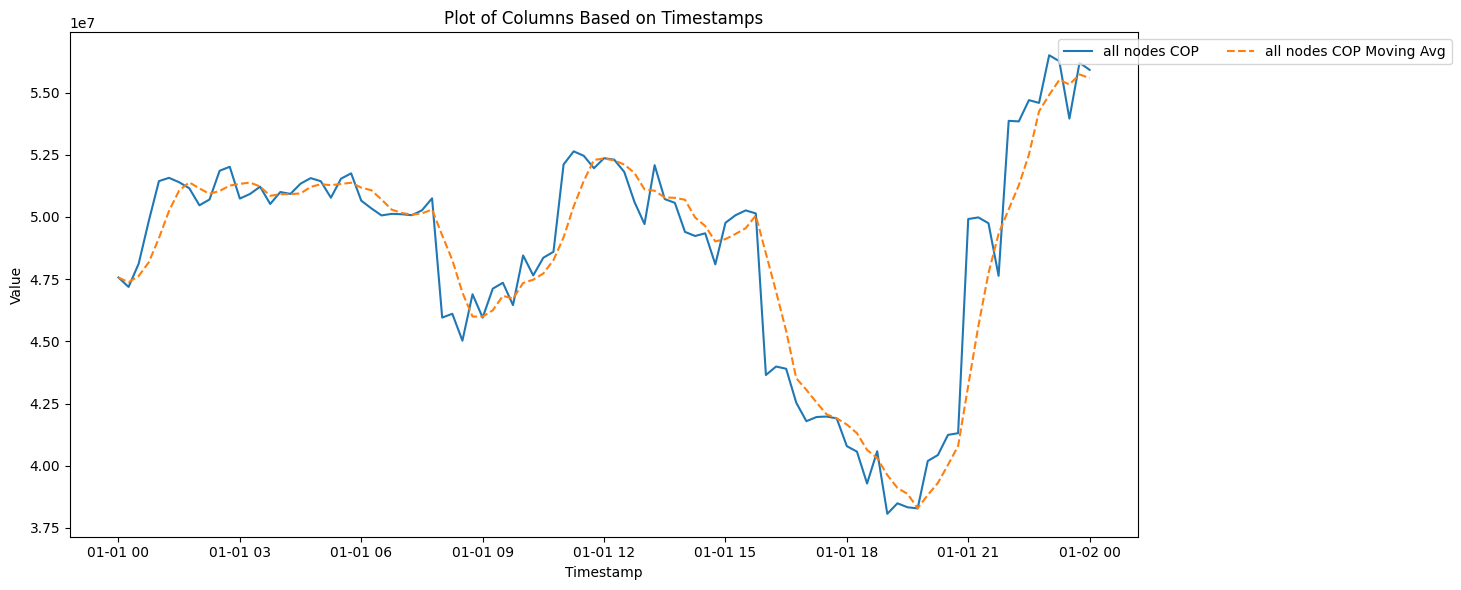

In [73]:
window_size = '1H'  # Adjust window size as needed
start_date = '2021-01-01 00:00:00+00:00'
end_date = '2021-01-02 00:00:00+00:00'
plots_to_display = "data_and_movingavrg"
# plots_to_display = "movingavrg"
allnodes_cop_plotter (cop_sum, window_size, start_date, end_date, plots_to_display)

One month April 2021

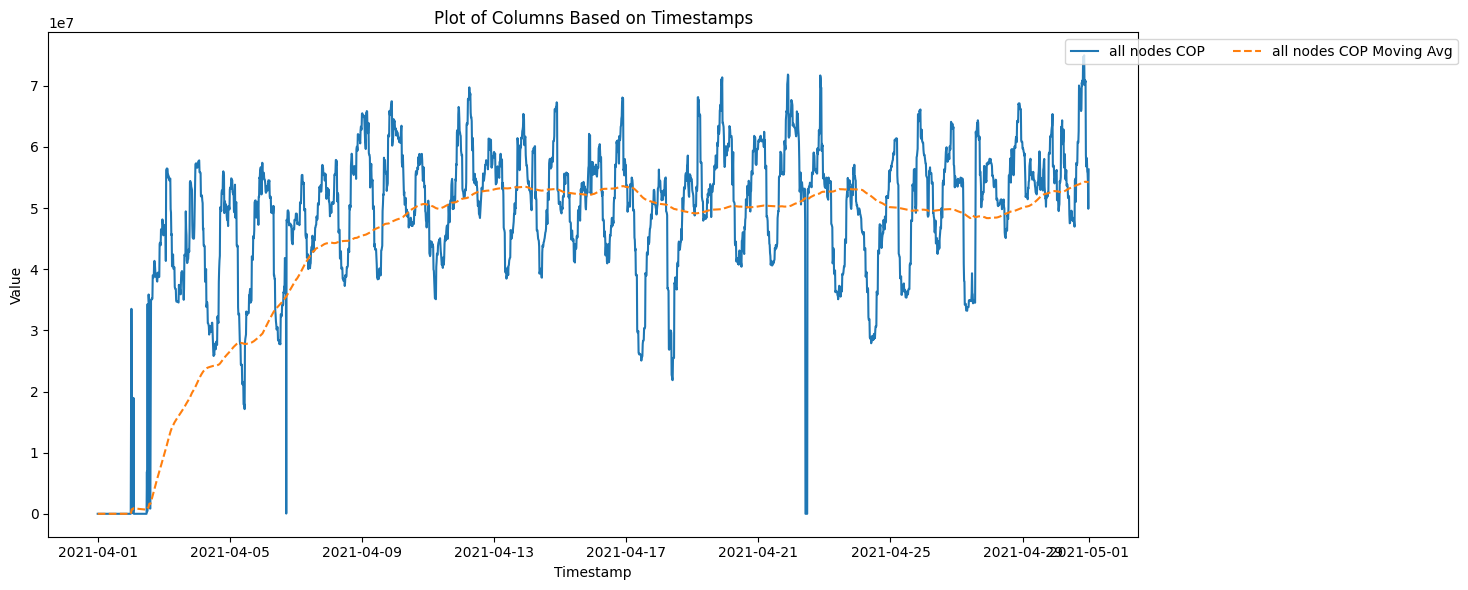

In [74]:
window_size = '5D'  # Adjust window size as needed
start_date = '2021-04-01 00:00:00+00:00'
end_date = '2021-05-01 00:00:00+00:00'
plots_to_display = "data_and_movingavrg"
# plots_to_display = "movingavrg"
allnodes_cop_plotter (cop_sum, window_size, start_date, end_date, plots_to_display)

###LINKS

https://gitlab.com/ecs-lab/courses/lab-of-big-data/gc#how-to-calculate-energy-from-power-consumption

https://transparency.entsoe.eu/generation/r2/actualGenerationPerProductionType/show?name=&defaultValue=false&viewType=GRAPH&areaType=BZN&atch=false&datepicker-day-offset-select-dv-date-from_input=D&dateTime.dateTime=06.03.2024+00:00%7CCET%7CDAYTIMERANGE&dateTime.endDateTime=06.03.2024+00:00%7CCET%7CDAYTIMERANGE&area.values=CTY%7C10YIT-GRTN-----B!BZN%7C10Y1001A1001A73I&productionType.values=B01&productionType.values=B02&productionType.values=B03&productionType.values=B04&productionType.values=B05


https://www.electricitymaps.com/data-portal/italy

**Linear Regression Model - predicting based on the prior month's data**


In [75]:
# Load the dataset
file_path = '/content/BigData/MyDrive/concat_data.csv'
df = pd.read_csv(file_path)
print(df.columns)



Index(['Datetime (UTC)', 'Carbon Intensity gCO₂eq/kWh (LCA)'], dtype='object')


In [76]:
# Extract the 'LCA' column
lca_data = df['Carbon Intensity gCO₂eq/kWh (LCA)']
dates = df['Datetime (UTC)']

# Create sequences of one month's data for 'X' and the following month's data for 'y'
def create_sequences(data, dates, window_size):
    X, y, date_seqs = [], [], []
    for i in range(len(data) - 2 * window_size + 1):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size:i + 2 * window_size])
        date_seqs.append(dates[i + window_size:i + 2 * window_size])
    return np.array(X), np.array(y), np.array(date_seqs)

# Define the window size (number of hours in a month)
window_size = 30 * 24  # 30 days * 24 hours

# Create the sequences
X, y, date_seqs = create_sequences(lca_data.values, dates.values, window_size)

# Display the shapes of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, date_seqs, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
# Calculate MAPE based on the mean of X_test
mean_x_test = np.mean(X_test, axis=1).reshape(-1, 1)
mean_x_test_repeated = np.tile(mean_x_test, (1, y_test.shape[1]))
mape_mean_x_test = mean_absolute_percentage_error(y_test, mean_x_test_repeated) * 100  # Convert to percentage


Shape of X: (24841, 720)
Shape of y: (24841, 720)


In [77]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 2534.1121802113566
R-squared: 0.4984255774223376
Mean Absolute Percentage Error: 13.84%
Mean Absolute Percentage Error (based on mean of X_test): 18.61%


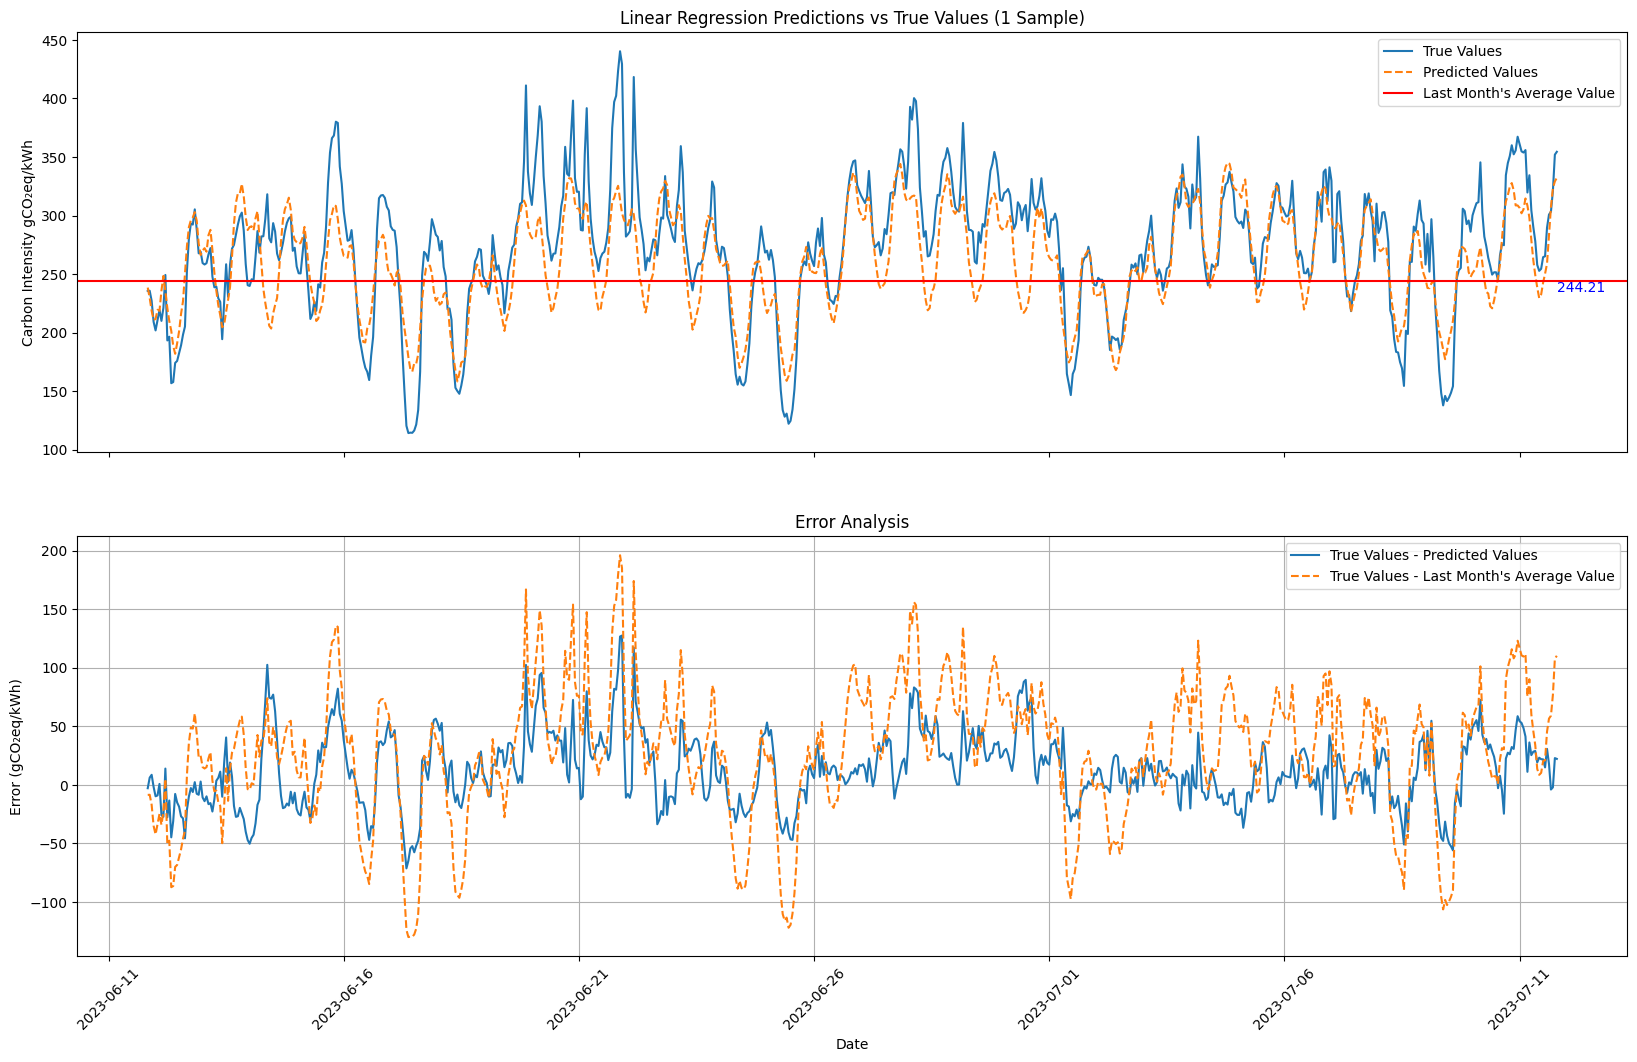

In [78]:
# Select 1 sample from the test set for plotting
num_samples = 145
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
X_pred_sample = X_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Calculate the average value of the predictions for the last month
avg_last_month_pred = X_pred_sample.mean()

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('Linear Regression Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**KNN Model - predicting based on the prior month's data**

In [79]:
# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage



In [80]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 502.5241939057892
R-squared: 0.9006311721637462
Mean Absolute Percentage Error: 5.85%
Mean Absolute Percentage Error (based on mean of X_test): 18.61%


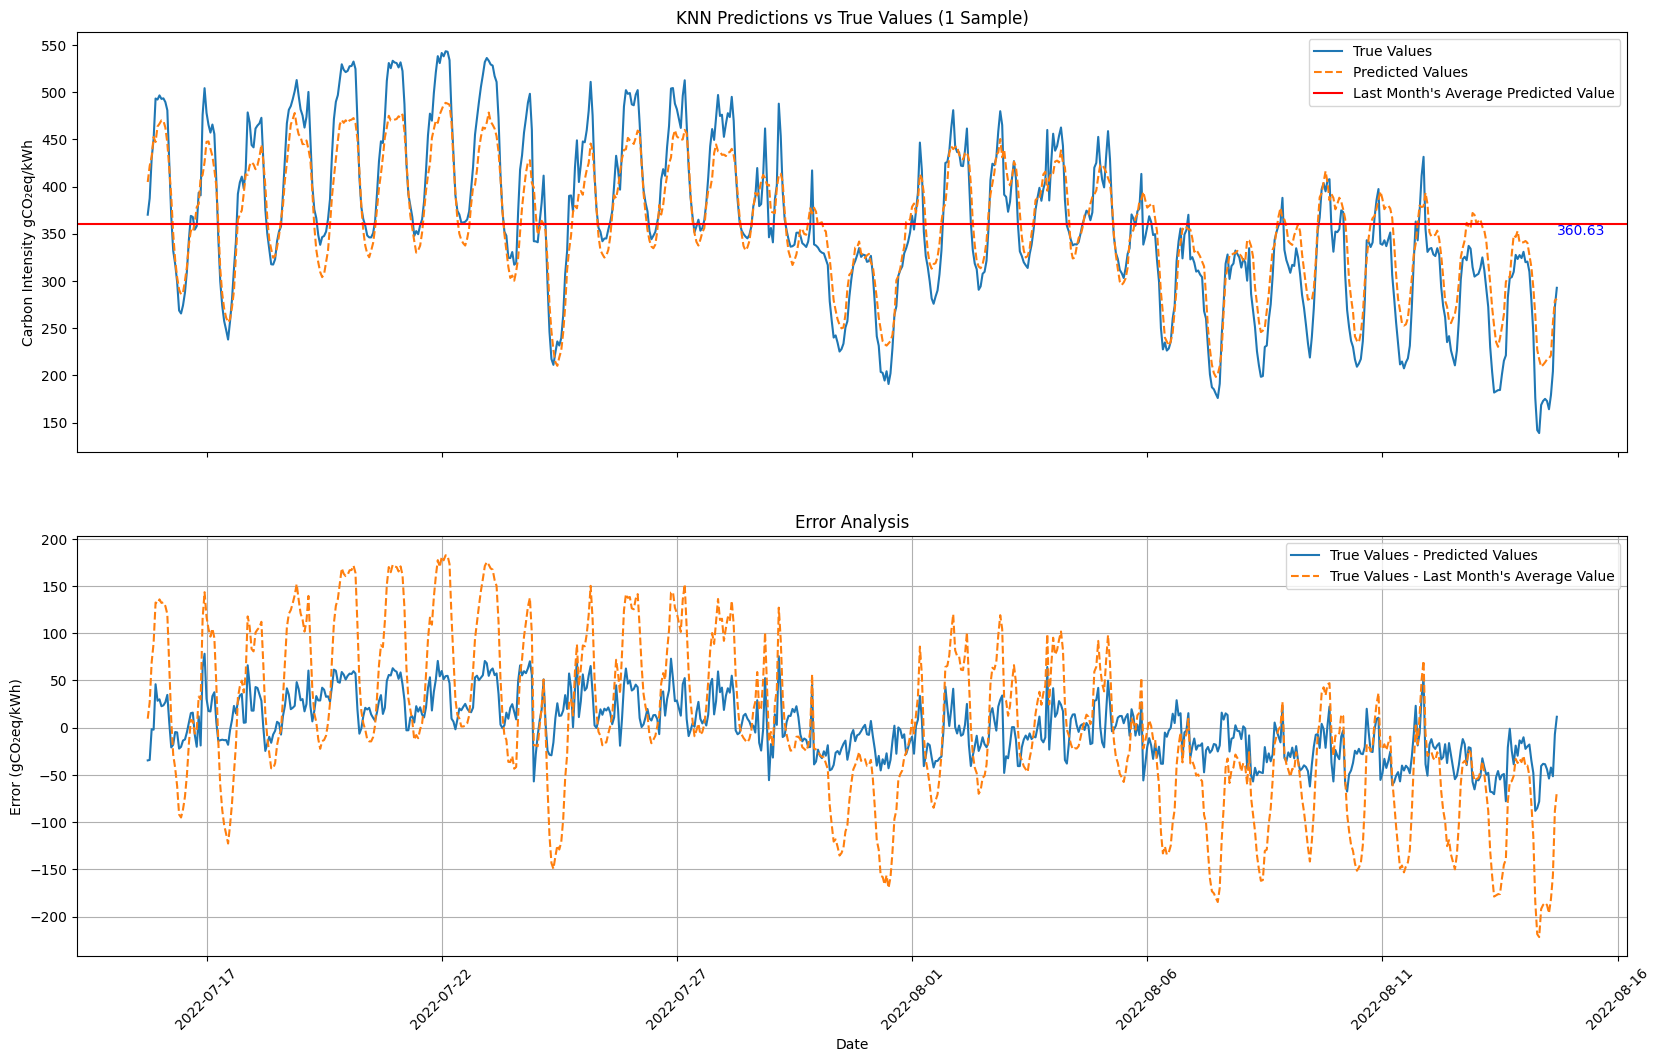

In [81]:
# Select 1 sample from the test set for plotting
num_samples = 1
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate the average value of the predictions for the last month
avg_last_month_pred = y_pred_sample.mean()

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Predicted Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('KNN Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values ')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Decision Tree Model - predicting based on the prior month's data**

In [82]:
# Initialize the Decision Tree model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

# Calculate MAPE based on the mean of X_test
mean_x_test = np.mean(X_test, axis=1).reshape(-1, 1)
mean_x_test_repeated = np.tile(mean_x_test, (1, y_test.shape[1]))
mape_mean_x_test = mean_absolute_percentage_error(y_test, mean_x_test_repeated) * 100  # Convert to percentage



In [83]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 3691.241263739519
R-squared: 0.2698463078698814
Mean Absolute Percentage Error: 15.09%
Mean Absolute Percentage Error (based on mean of X_test): 18.61%


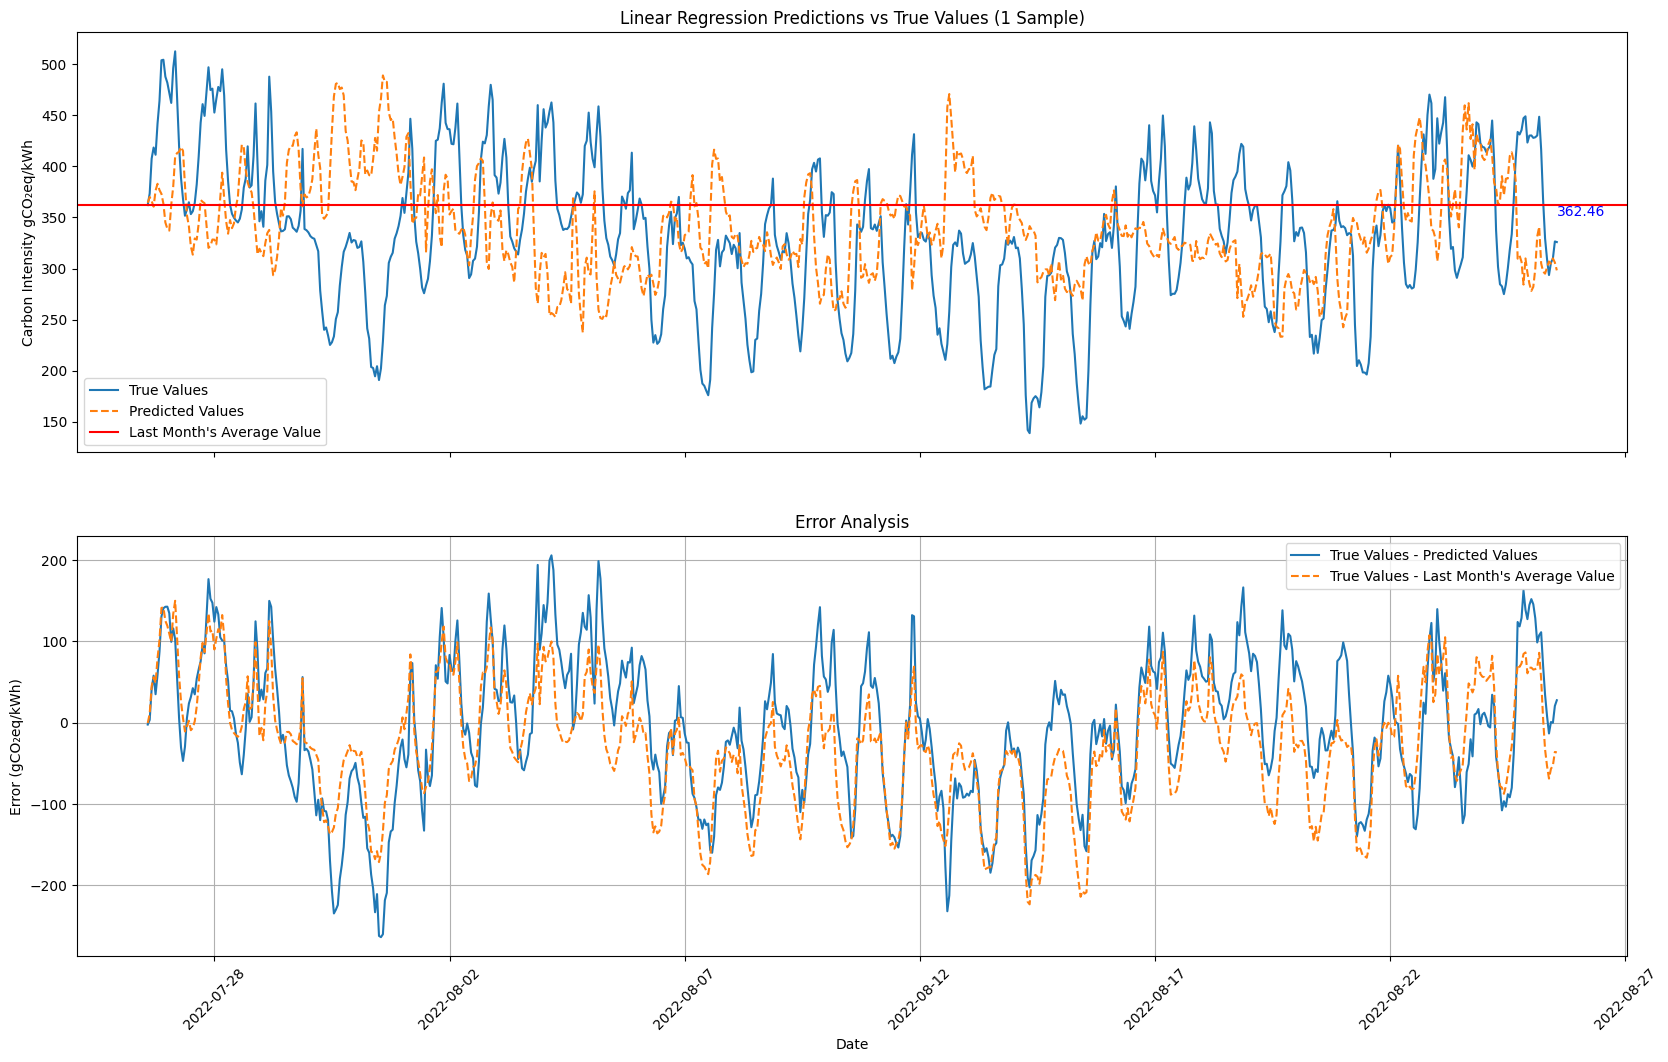

In [84]:
# Select 1 sample from the test set for plotting
num_samples = 1
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
X_pred_sample = X_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Calculate the average value of the predictions for the last month
avg_last_month_pred = X_pred_sample.mean()

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('Linear Regression Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Linear Regression Model - predicting based on the prior year's data**

In [85]:
# Define window sizes
year_window_size = 365 * 24  # 365 days * 24 hours (1 year)
month_window_size = 30 * 24  # 30 days * 24 hours (1 month)

# Create sequences of one year's data for 'X' and the following month's data for 'y'
def create_year_month_sequences(data, dates, year_window_size, month_window_size):
    X, y, date_seqs = [], [], []
    for i in range(len(data) - year_window_size - month_window_size + 1):
        X.append(data[i:i + year_window_size])
        y.append(data[i + year_window_size:i + year_window_size + month_window_size])
        date_seqs.append(dates[i + year_window_size:i + year_window_size + month_window_size])
    return np.array(X), np.array(y), np.array(date_seqs)

# Create the sequences
X, y, date_seqs = create_year_month_sequences(lca_data.values, dates.values, year_window_size, month_window_size)

# Display the shapes of X and y
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
dates_train, dates_test = date_seqs[:train_size], date_seqs[train_size:]

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
# Calculate MAPE based on the mean of X_test
mean_x_test = np.mean(X_test, axis=1).reshape(-1, 1)
mean_x_test_repeated = np.tile(mean_x_test, (1, y_test.shape[1]))
mape_mean_x_test = mean_absolute_percentage_error(y_test, mean_x_test_repeated) * 100  # Convert to percentage



Shape of X: (16801, 8760)
Shape of y: (16801, 720)


In [86]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 7273.257315474314
R-squared: -1.3939783951235336
Mean Absolute Percentage Error: 28.27%
Mean Absolute Percentage Error (based on mean of X_test): 25.56%


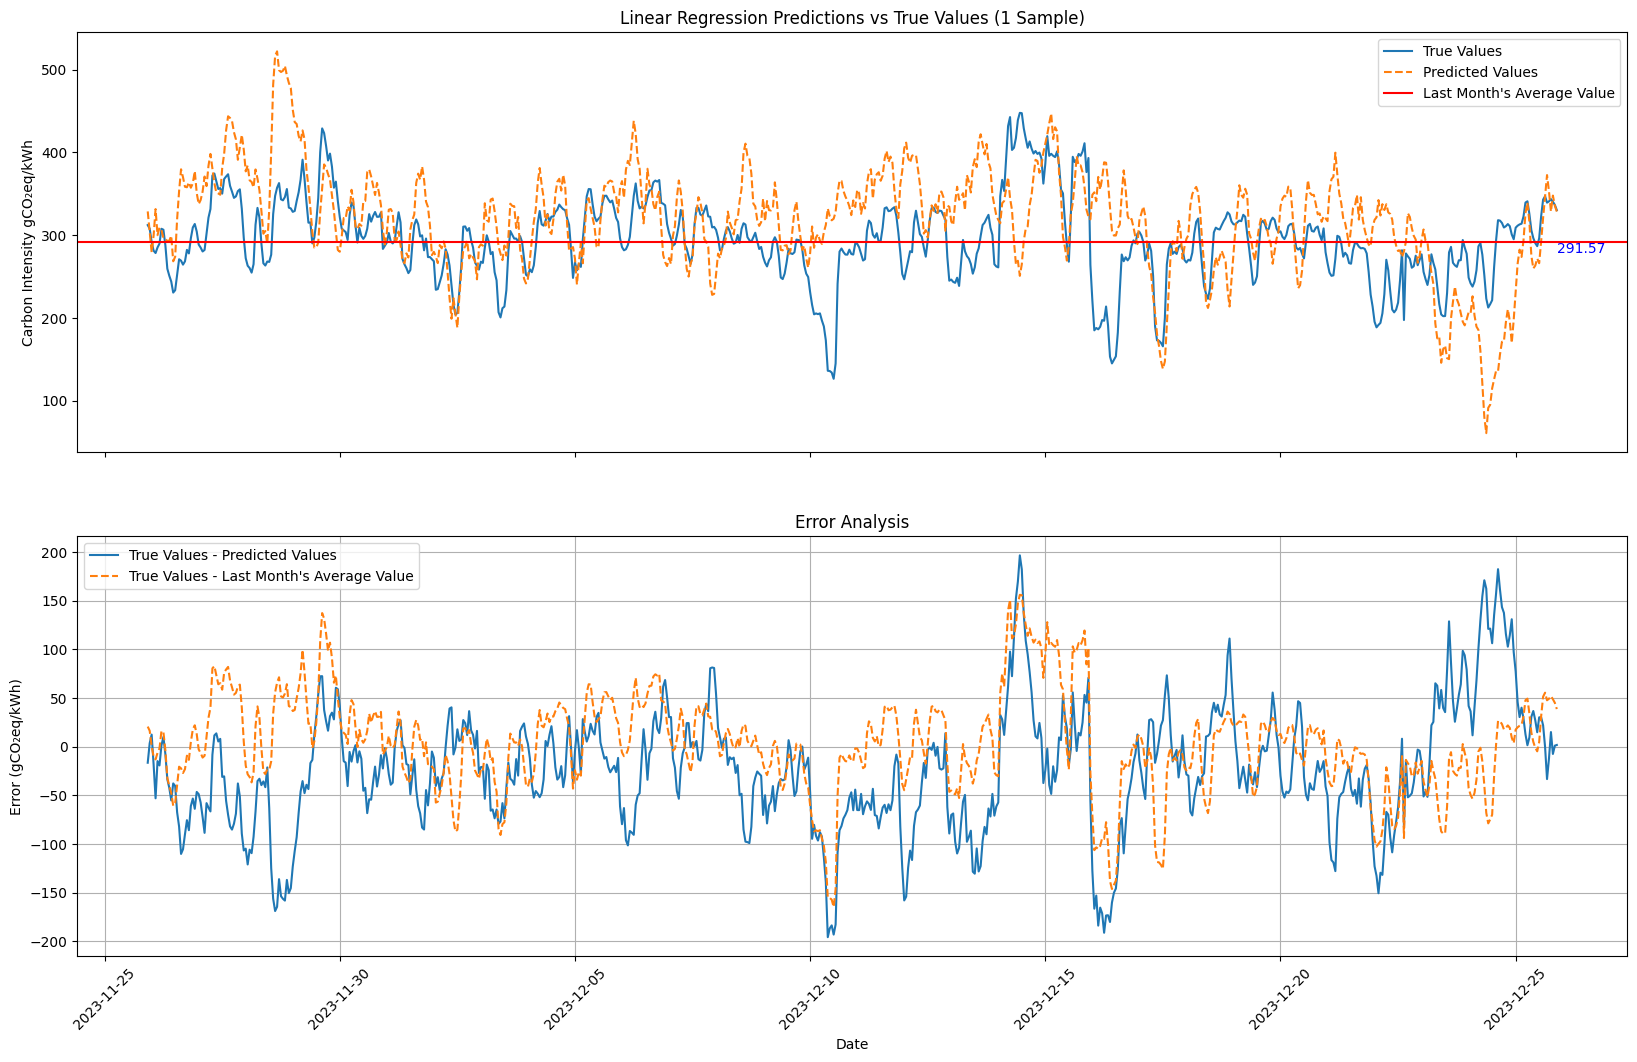

In [87]:
# Select 1 sample from the test set for plotting
num_samples = 1
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
X_pred_sample = X_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Calculate the average value of the predictions for the last month
avg_last_month_pred = X_pred_sample.mean()

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('Linear Regression Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**KNN Model - predicting based on the prior year's data**

In [88]:
# Initialize the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage
# Calculate MAPE based on the mean of X_test
mean_x_test = np.mean(X_test, axis=1).reshape(-1, 1)
mean_x_test_repeated = np.tile(mean_x_test, (1, y_test.shape[1]))
mape_mean_x_test = mean_absolute_percentage_error(y_test, mean_x_test_repeated) * 100  # Convert to percentage

In [89]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 3781.254801224468
R-squared: -0.24771038143776714
Mean Absolute Percentage Error: 19.55%
Mean Absolute Percentage Error (based on mean of X_test): 25.56%


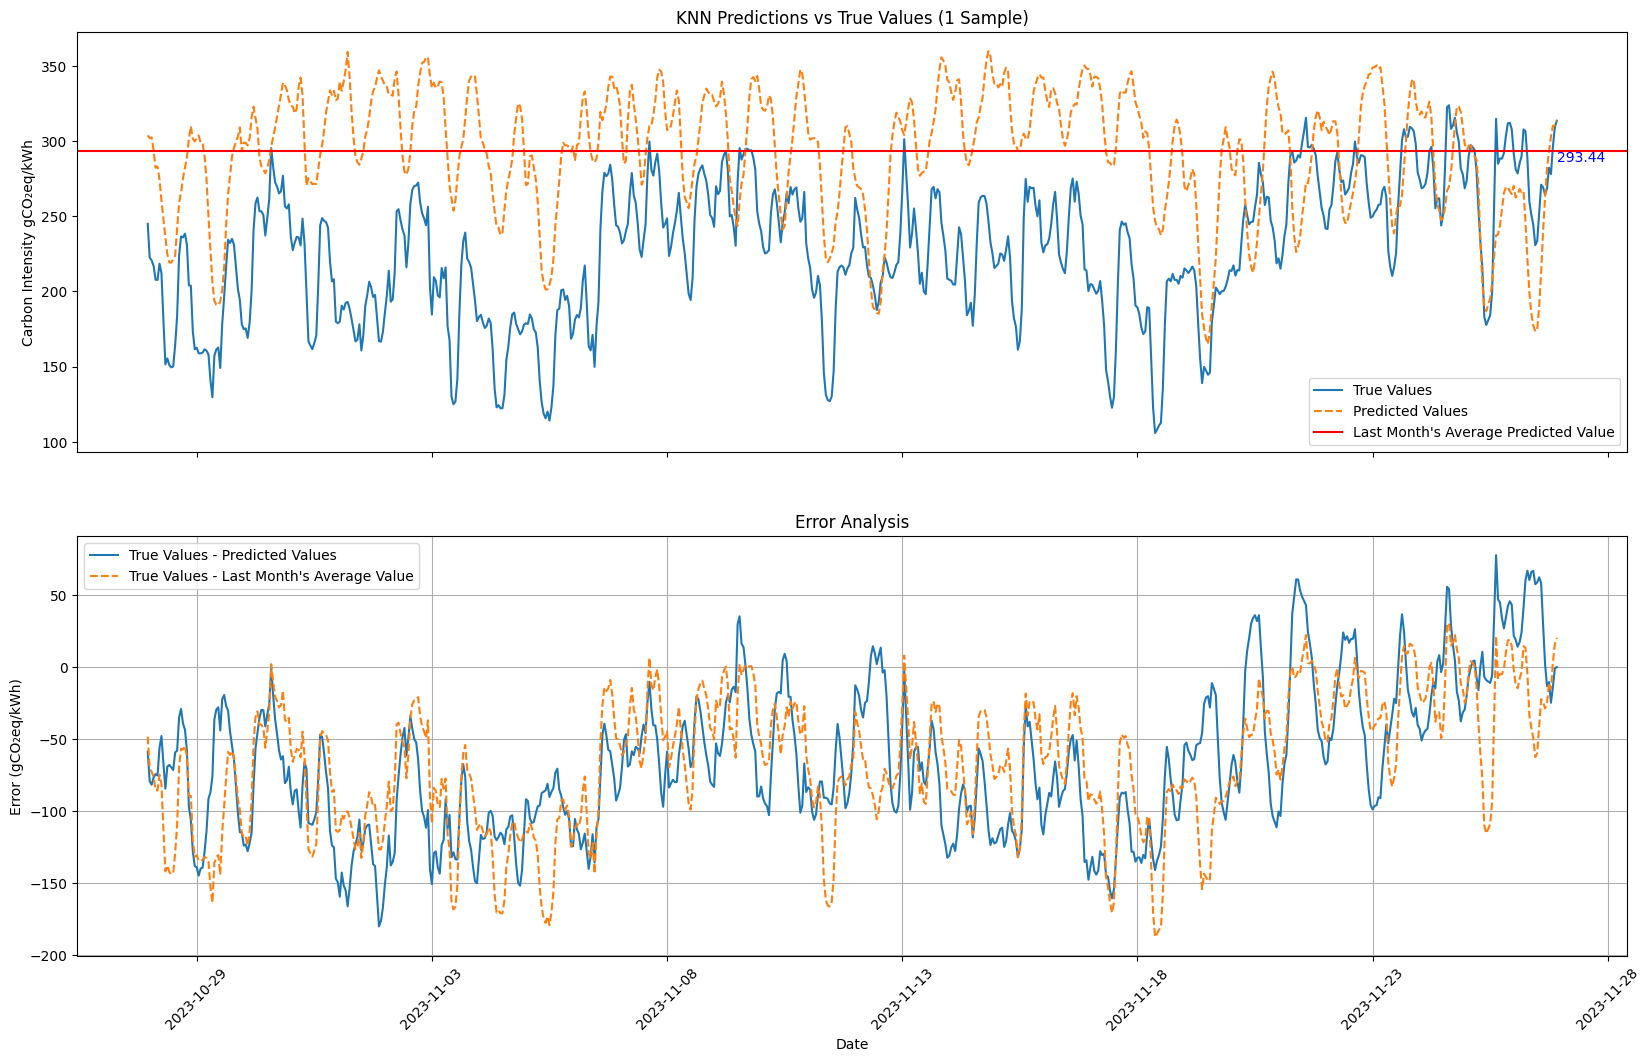

In [90]:
# Select 1 sample from the test set for plotting
num_samples = 1
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate the average value of the predictions for the last month
avg_last_month_pred = y_pred_sample.mean()

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Predicted Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('KNN Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Decision Tree Model - predicting based on the prior year's data**

In [91]:
# Initialize the Decision Tree model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # Convert to percentage

# Calculate MAPE based on the mean of X_test
mean_x_test = np.mean(X_test, axis=1).reshape(-1, 1)
mean_x_test_repeated = np.tile(mean_x_test, (1, y_test.shape[1]))
mape_mean_x_test = mean_absolute_percentage_error(y_test, mean_x_test_repeated) * 100  # Convert to percentage



In [92]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Percentage Error: {mape:.2f}%")
print(f"Mean Absolute Percentage Error (based on mean of X_test): {mape_mean_x_test:.2f}%")

Mean Squared Error: 6119.453609511885
R-squared: -1.0171322019927158
Mean Absolute Percentage Error: 25.22%
Mean Absolute Percentage Error (based on mean of X_test): 25.56%


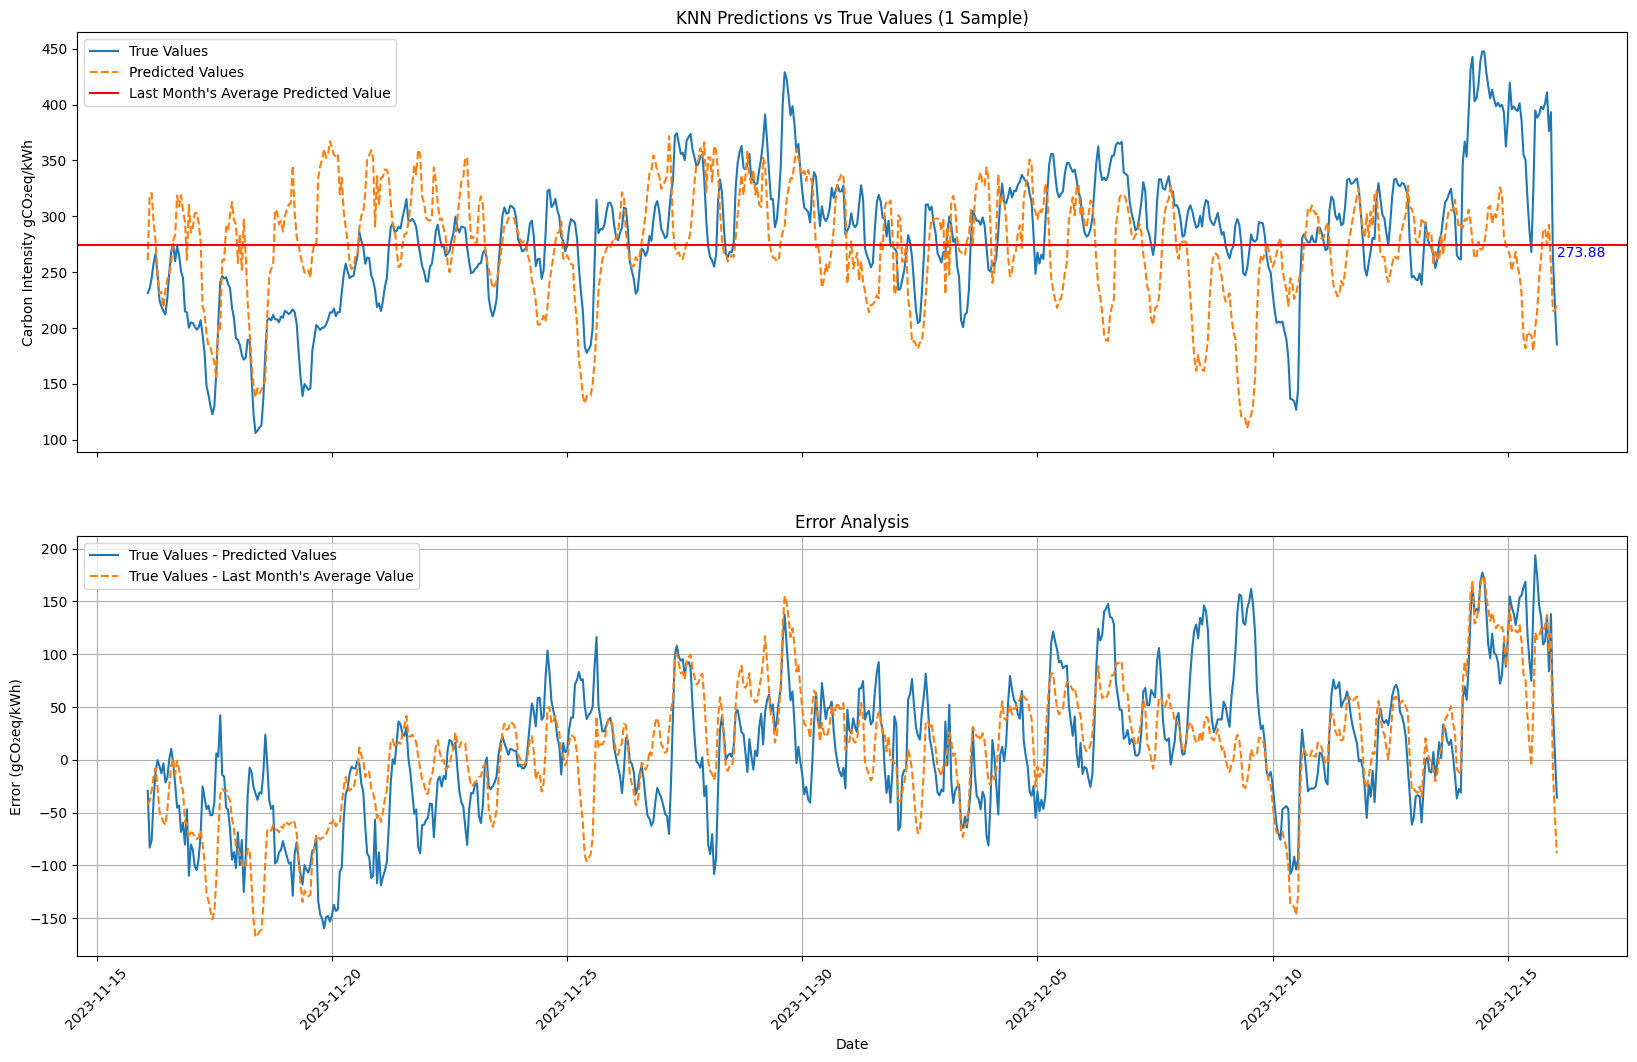

In [93]:
# Select 1 sample from the test set for plotting
num_samples = 1
indices = np.random.choice(len(y_test), num_samples, replace=False)

y_test_sample = y_test[indices][0]
y_pred_sample = y_pred[indices][0]
dates_sample = dates_test[indices][0]

# Convert date strings to datetime objects if necessary
dates_sample = pd.to_datetime(dates_sample)

# Calculate the average value of the predictions for the last month
avg_last_month_pred = y_pred_sample.mean()

# Calculate errors
errors_true = y_test_sample - y_pred_sample
errors_avg = y_test_sample - avg_last_month_pred

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 12), sharex=True)

# Plot the true vs predicted values
ax1.plot(dates_sample, y_test_sample, label='True Values')
ax1.plot(dates_sample, y_pred_sample, label='Predicted Values', linestyle='--')
ax1.axhline(y=avg_last_month_pred, color='r', linestyle='-', label="Last Month's Average Predicted Value")
ax1.text(dates_sample[-1], avg_last_month_pred, f'{avg_last_month_pred:.2f}', color='b', va='top')
ax1.set_ylabel('Carbon Intensity gCO₂eq/kWh')
ax1.set_title('KNN Predictions vs True Values (1 Sample)')
ax1.legend()

# Plot the errors
ax2.plot(dates_sample, errors_true, label='True Values - Predicted Values')
ax2.plot(dates_sample, errors_avg, label="True Values - Last Month's Average Value", linestyle='--')
ax2.set_xlabel('Date')
ax2.set_ylabel('Error (gCO₂eq/kWh)')
ax2.set_title('Error Analysis')
ax2.legend()

# Set date format on X-axis to show every 5 days
locator = mdates.DayLocator(interval=5)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.xticks(rotation=45)
plt.grid(True)
plt.show()
